<a href="https://colab.research.google.com/github/Alwaleedha/Airlines-Delay-Causes---1st-Project/blob/main/Final_Airline_Delays_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries & reading data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Necessary imports
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline
%config InlineBackend.figure_formats = ['retina']

sns.set_style("darkgrid", {"font.family": ["serif"]})
pd.set_option('display.max_columns', None) # To show all columns



# Reading data
df = pd.read_csv("/content/airline delay causes.csv")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Populating the interactive namespace from numpy and matplotlib


# Data cleaning

Using info() to summary the data to detect the following:

*  Features names
*  Null Values
*  Data types

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292669 entries, 0 to 292668
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 292669 non-null  int64  
 1    month               292669 non-null  int64  
 2   carrier              292669 non-null  object 
 3   carrier_name         292669 non-null  object 
 4   airport              292669 non-null  object 
 5   airport_name         292669 non-null  object 
 6   arr_flights          292207 non-null  float64
 7   arr_del15            291981 non-null  float64
 8   carrier_ct           292207 non-null  float64
 9    weather_ct          292207 non-null  float64
 10  nas_ct               292207 non-null  float64
 11  security_ct          292207 non-null  float64
 12  late_aircraft_ct     292207 non-null  float64
 13  arr_cancelled        292207 non-null  float64
 14  arr_diverted         292207 non-null  float64
 15   arr_delay       

- Based on the results above, the following actions is required:

- Index No. 21, (Unamed) column will be droped because it has al NULL values
- The following columns name must be modified be removing first digit space using rename function:
    - Index No. 1 from (' month') to ('month')
    - Index No. 9 from (' weather_ct) to ('weather_ct')
    - Index No. 15 from (' arr_delay') to ('arr_delay')
    - Index No. 16 from (' carrier_delay') to ('carrier_delay')
- Renaming some columns for batter understanding of each column
- Reorder features indices
- Will sum the number of NA data and action accordingly

Here we are using md.dropna to delete column No. 21 because all column is null as mentioned in md.info() 

In [3]:
# Drop Unnamed column: 21
df = df.dropna(axis=1, how='all')

In [4]:
# Modify columns name by removing first digit space using rename function:
df.rename(columns={' month':'month',' weather_ct':'weather_ct',' arr_delay':'arr_delay',
                   ' carrier_delay':'carrier_delay'} , inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
#Renaming some columns for batter understanding of each column >> ct for count  >>  tm for time
df.rename(columns={'arr_flights':'arr_flights_ct', 'arr_del15':'arr_delay_ct', 'arr_cancelled':'arr_cancelled_ct', 
                   'arr_diverted':'arr_diverted_ct', 'arr_delay':'arr_delay_tm', 'carrier_delay':'carrier_delay_tm',
                   'weather_delay':'weather_delay_tm', 'nas_delay':'nas_delay_tm', 'security_delay':'security_delay_tm',
                   'late_aircraft_delay':'late_aircraft_delay_tm'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
# Reordering features indices to ease reading the data
new_c = ["year","month","carrier","carrier_name","airport","airport_name","arr_flights_ct","arr_delay_ct","arr_cancelled_ct",
          "arr_diverted_ct","carrier_ct","weather_ct","nas_ct","security_ct","late_aircraft_ct",
          "arr_delay_tm","carrier_delay_tm","weather_delay_tm","nas_delay_tm","security_delay_tm","late_aircraft_delay_tm",]
df = df.reindex(columns=new_c)

In [7]:
# Finding the sum of NA values to action accordingly
df.isna().sum()

year                        0
month                       0
carrier                     0
carrier_name                0
airport                     0
airport_name                0
arr_flights_ct            462
arr_delay_ct              688
arr_cancelled_ct          462
arr_diverted_ct           462
carrier_ct                462
weather_ct                462
nas_ct                    462
security_ct               462
late_aircraft_ct          462
arr_delay_tm              462
carrier_delay_tm          462
weather_delay_tm          462
nas_delay_tm              462
security_delay_tm         462
late_aircraft_delay_tm    462
dtype: int64

*  688 NA values out of 292669 is 0.23% can be dropped
*  Using dropna() function, how=’any’ to drop if any missing values.

In [8]:
df.dropna(axis=0, how='any', inplace=True)
df.head(3)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights_ct,arr_delay_ct,arr_cancelled_ct,arr_diverted_ct,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_delay_tm,carrier_delay_tm,weather_delay_tm,nas_delay_tm,security_delay_tm,late_aircraft_delay_tm
0,2009,11,AS,Alaska Airlines Inc.,BRW,"Barrow, AK: Wiley Post/Will Rogers Memorial",65.0,14.0,0.0,1.0,3.61,1.06,3.14,0.0,6.19,920.0,592.0,34.0,78.0,0.0,216.0
1,2009,11,AS,Alaska Airlines Inc.,BUR,"Burbank, CA: Bob Hope",85.0,5.0,0.0,0.0,1.00,0.00,3.03,0.0,0.98,134.0,25.0,0.0,70.0,0.0,39.0
2,2009,11,AS,Alaska Airlines Inc.,CDV,"Cordova, AK: Merle K Mudhole Smith",58.0,8.0,4.0,2.0,2.04,1.00,2.00,0.0,2.96,586.0,174.0,37.0,62.0,0.0,313.0


## Exploring The Data (EDA)

In [9]:
df.describe()

,year,month,arr_flights_ct,arr_delay_ct,arr_cancelled_ct,arr_diverted_ct,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_delay_tm,carrier_delay_tm,weather_delay_tm,nas_delay_tm,security_delay_tm,late_aircraft_delay_tm
count,291981.000000,291981.000000,291981.000000,291981.000000,291981.000000,291981.000000,291981.000000,291981.000000,291981.000000,291981.000000,291981.00000,291981.000000,291981.000000,291981.000000,291981.000000,291981.000000,291981.000000
mean,2011.644062,6.568465,388.373408,74.473236,7.274552,0.882828,20.994408,2.659583,24.973052,0.173422,25.67283,4266.320665,1267.081108,220.732726,1144.835986,6.859481,1626.808957
std,5.202361,3.447108,1040.131283,202.362463,37.854771,3.972639,46.792374,10.132720,87.708489,0.827804,76.71669,12651.672470,3401.786772,859.061266,4788.573222,36.803536,4983.796826
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.00000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,4.000000,60.000000,9.000000,0.000000,0.000000,3.180000,0.000000,1.920000,0.000000,1.78000,458.000000,155.000000,0.000000,62.000000,0.000000,85.000000
50%,2011.000000,7.000000,123.000000,24.000000,1.000000,0.000000,8.460000,0.610000,5.870000,0.000000,6.17000,1243.000000,447.000000,26.000000,216.000000,0.000000,369.000000
75%,2016.000000,10.000000,278.000000,57.000000,4.000000,1.000000,19.890000,2.060000,16.020000,0.000000,17.65000,3138.000000,1102.000000,162.000000,627.000000,0.000000,1142.000000
max,2020.000000,12.000000,21977.000000,6377.000000,4951.000000,256.000000,1792.070000,717.940000,4091.270000,80.560000,1885.47000,433687.000000,196944.000000,57707.000000,238440.000000,3194.000000,148181.000000


The negative values in (nas_ct) and nas_delay_tm to be replaced with zeros

In [10]:
num = df._get_numeric_data()

num[num < 0] = 0

df.describe()

,year,month,arr_flights_ct,arr_delay_ct,arr_cancelled_ct,arr_diverted_ct,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_delay_tm,carrier_delay_tm,weather_delay_tm,nas_delay_tm,security_delay_tm,late_aircraft_delay_tm
count,291981.000000,291981.000000,291981.000000,291981.000000,291981.000000,291981.000000,291981.000000,291981.000000,291981.000000,291981.000000,291981.00000,291981.000000,291981.000000,291981.000000,291981.000000,291981.000000,291981.000000
mean,2011.644062,6.568465,388.373408,74.473236,7.274552,0.882828,20.994408,2.659583,24.973052,0.173422,25.67283,4266.320665,1267.081108,220.732726,1144.836054,6.859481,1626.808957
std,5.202361,3.447108,1040.131283,202.362463,37.854771,3.972639,46.792374,10.132720,87.708489,0.827804,76.71669,12651.672470,3401.786772,859.061266,4788.573206,36.803536,4983.796826
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,4.000000,60.000000,9.000000,0.000000,0.000000,3.180000,0.000000,1.920000,0.000000,1.78000,458.000000,155.000000,0.000000,62.000000,0.000000,85.000000
50%,2011.000000,7.000000,123.000000,24.000000,1.000000,0.000000,8.460000,0.610000,5.870000,0.000000,6.17000,1243.000000,447.000000,26.000000,216.000000,0.000000,369.000000
75%,2016.000000,10.000000,278.000000,57.000000,4.000000,1.000000,19.890000,2.060000,16.020000,0.000000,17.65000,3138.000000,1102.000000,162.000000,627.000000,0.000000,1142.000000
max,2020.000000,12.000000,21977.000000,6377.000000,4951.000000,256.000000,1792.070000,717.940000,4091.270000,80.560000,1885.47000,433687.000000,196944.000000,57707.000000,238440.000000,3194.000000,148181.000000


Plotting Histogram to show distribution of data for each feature

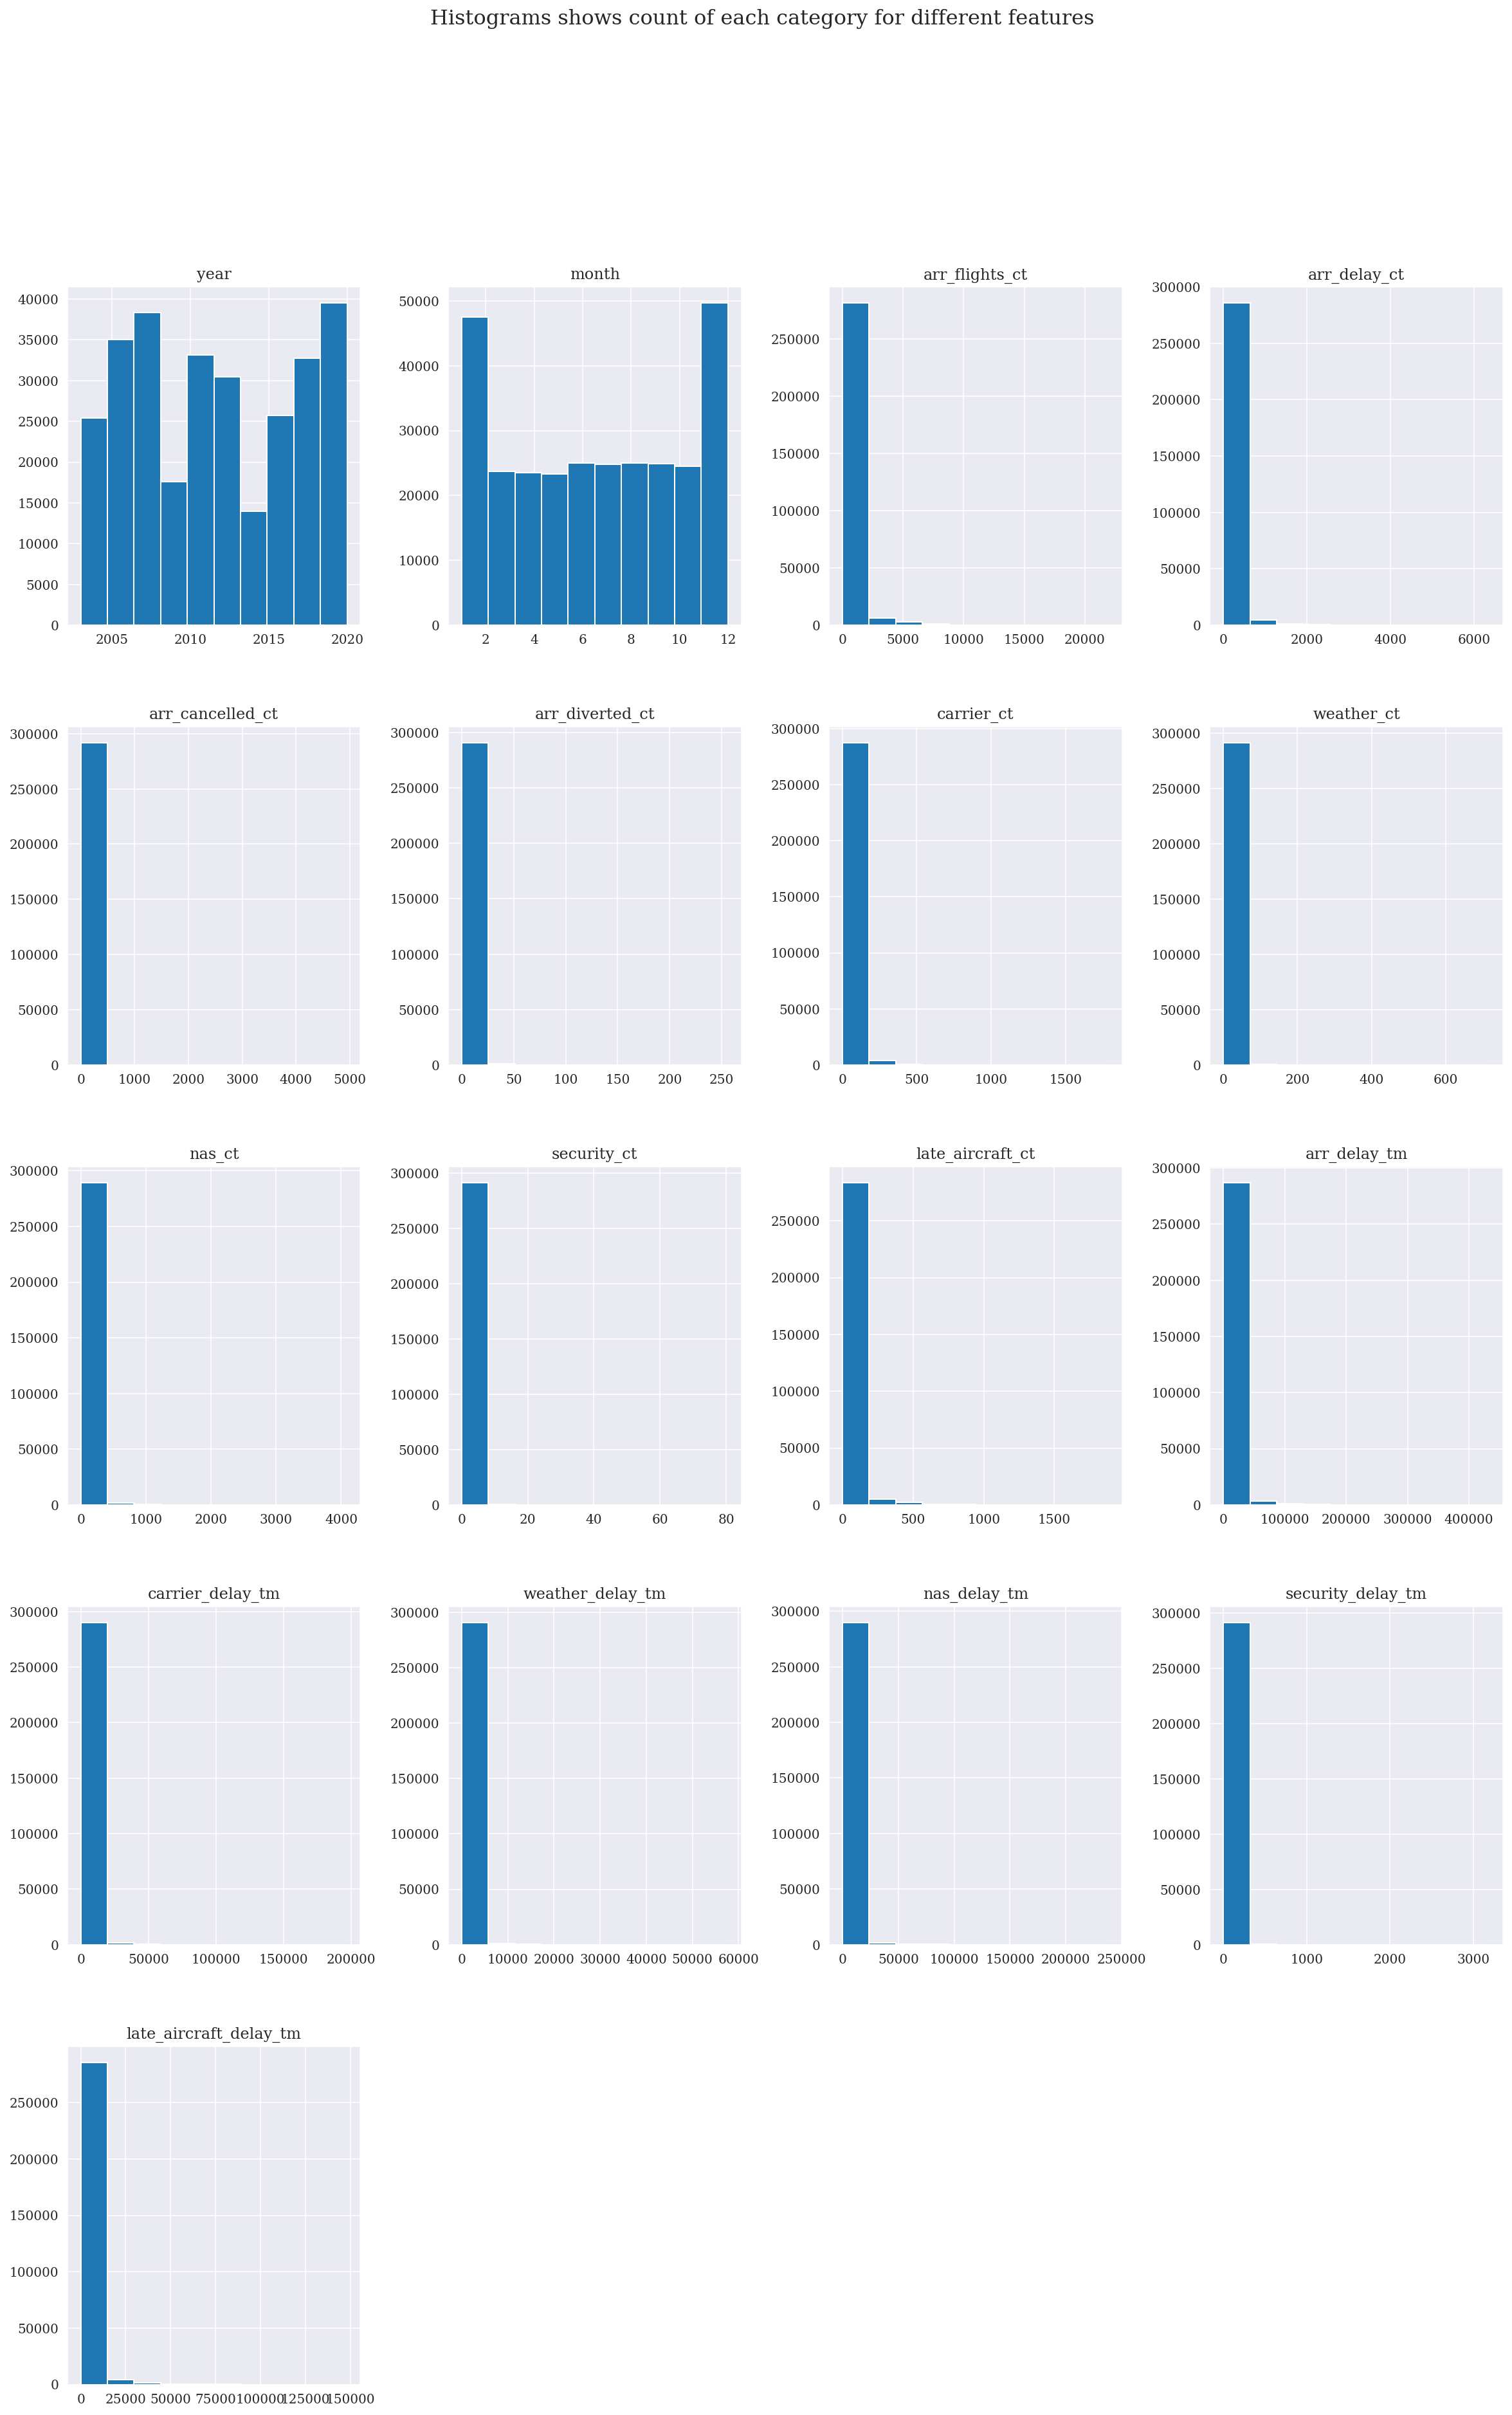

In [11]:
df.hist(figsize=(20,30))
plt.suptitle('Histograms shows count of each category for different features', fontsize=16);

Plotting boxplot to detect outliers of data for each feature

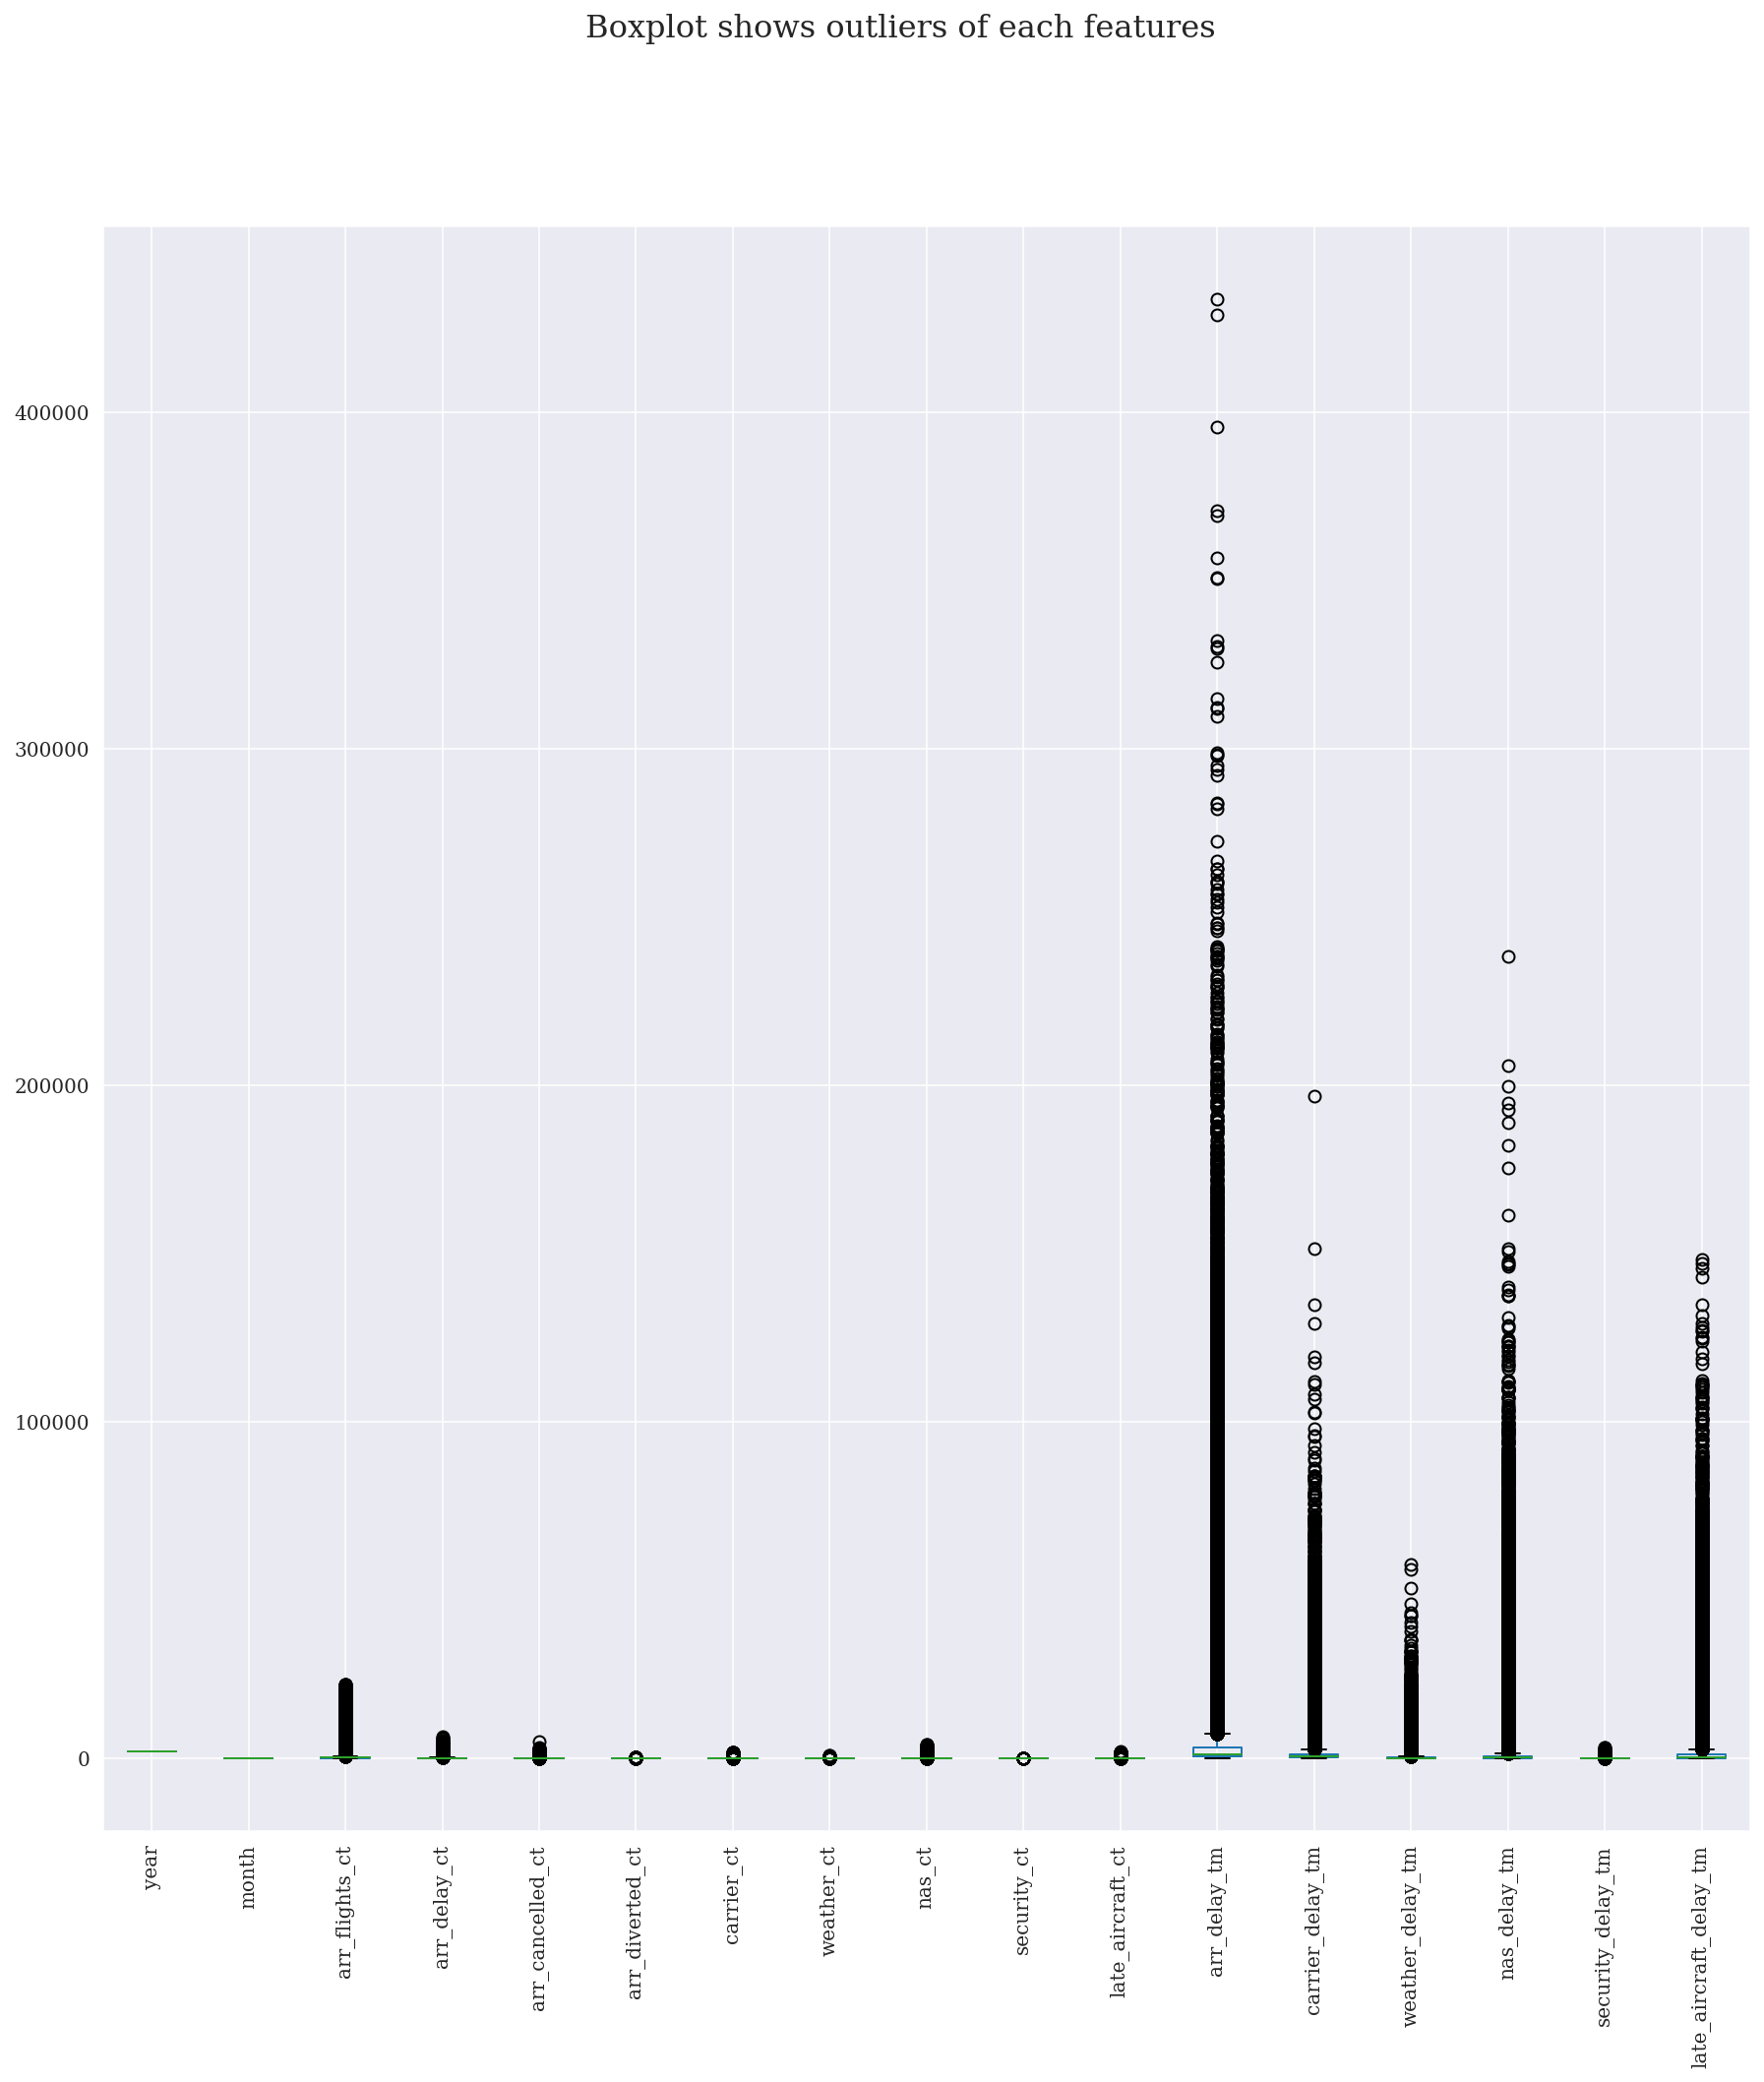

In [12]:
df.boxplot(figsize=(15,15))
plt.suptitle('Boxplot shows outliers of each features', fontsize=16)
plt.xticks(rotation=90);

Plot to show number of flights per airline

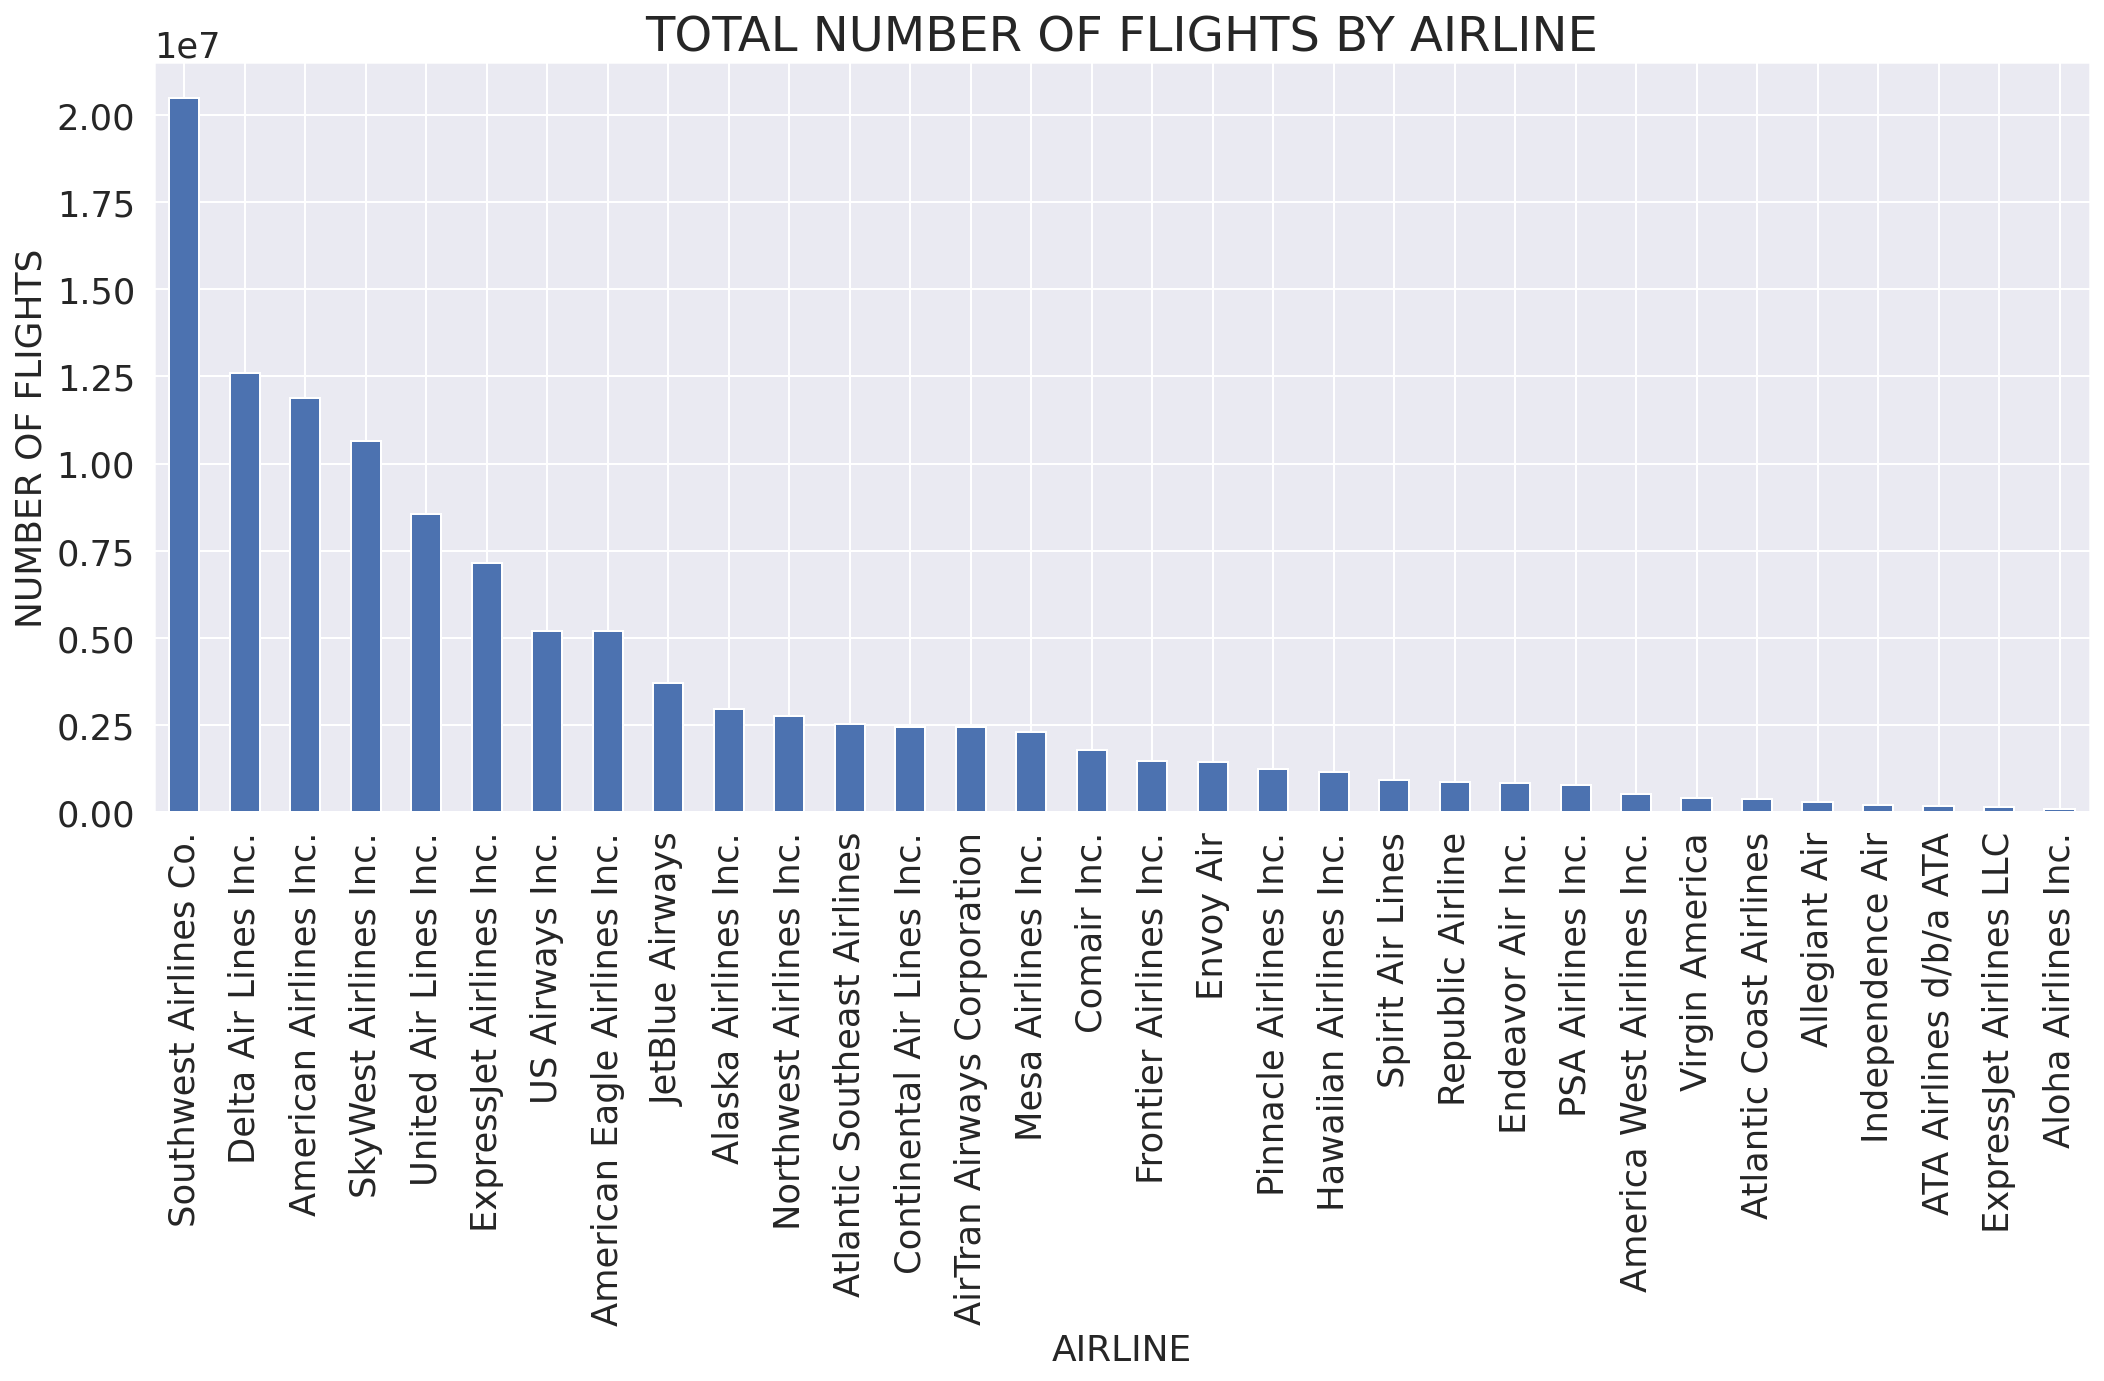

In [13]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.6)
df.groupby('carrier_name').arr_flights_ct.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

Plot to show number of flights per airline

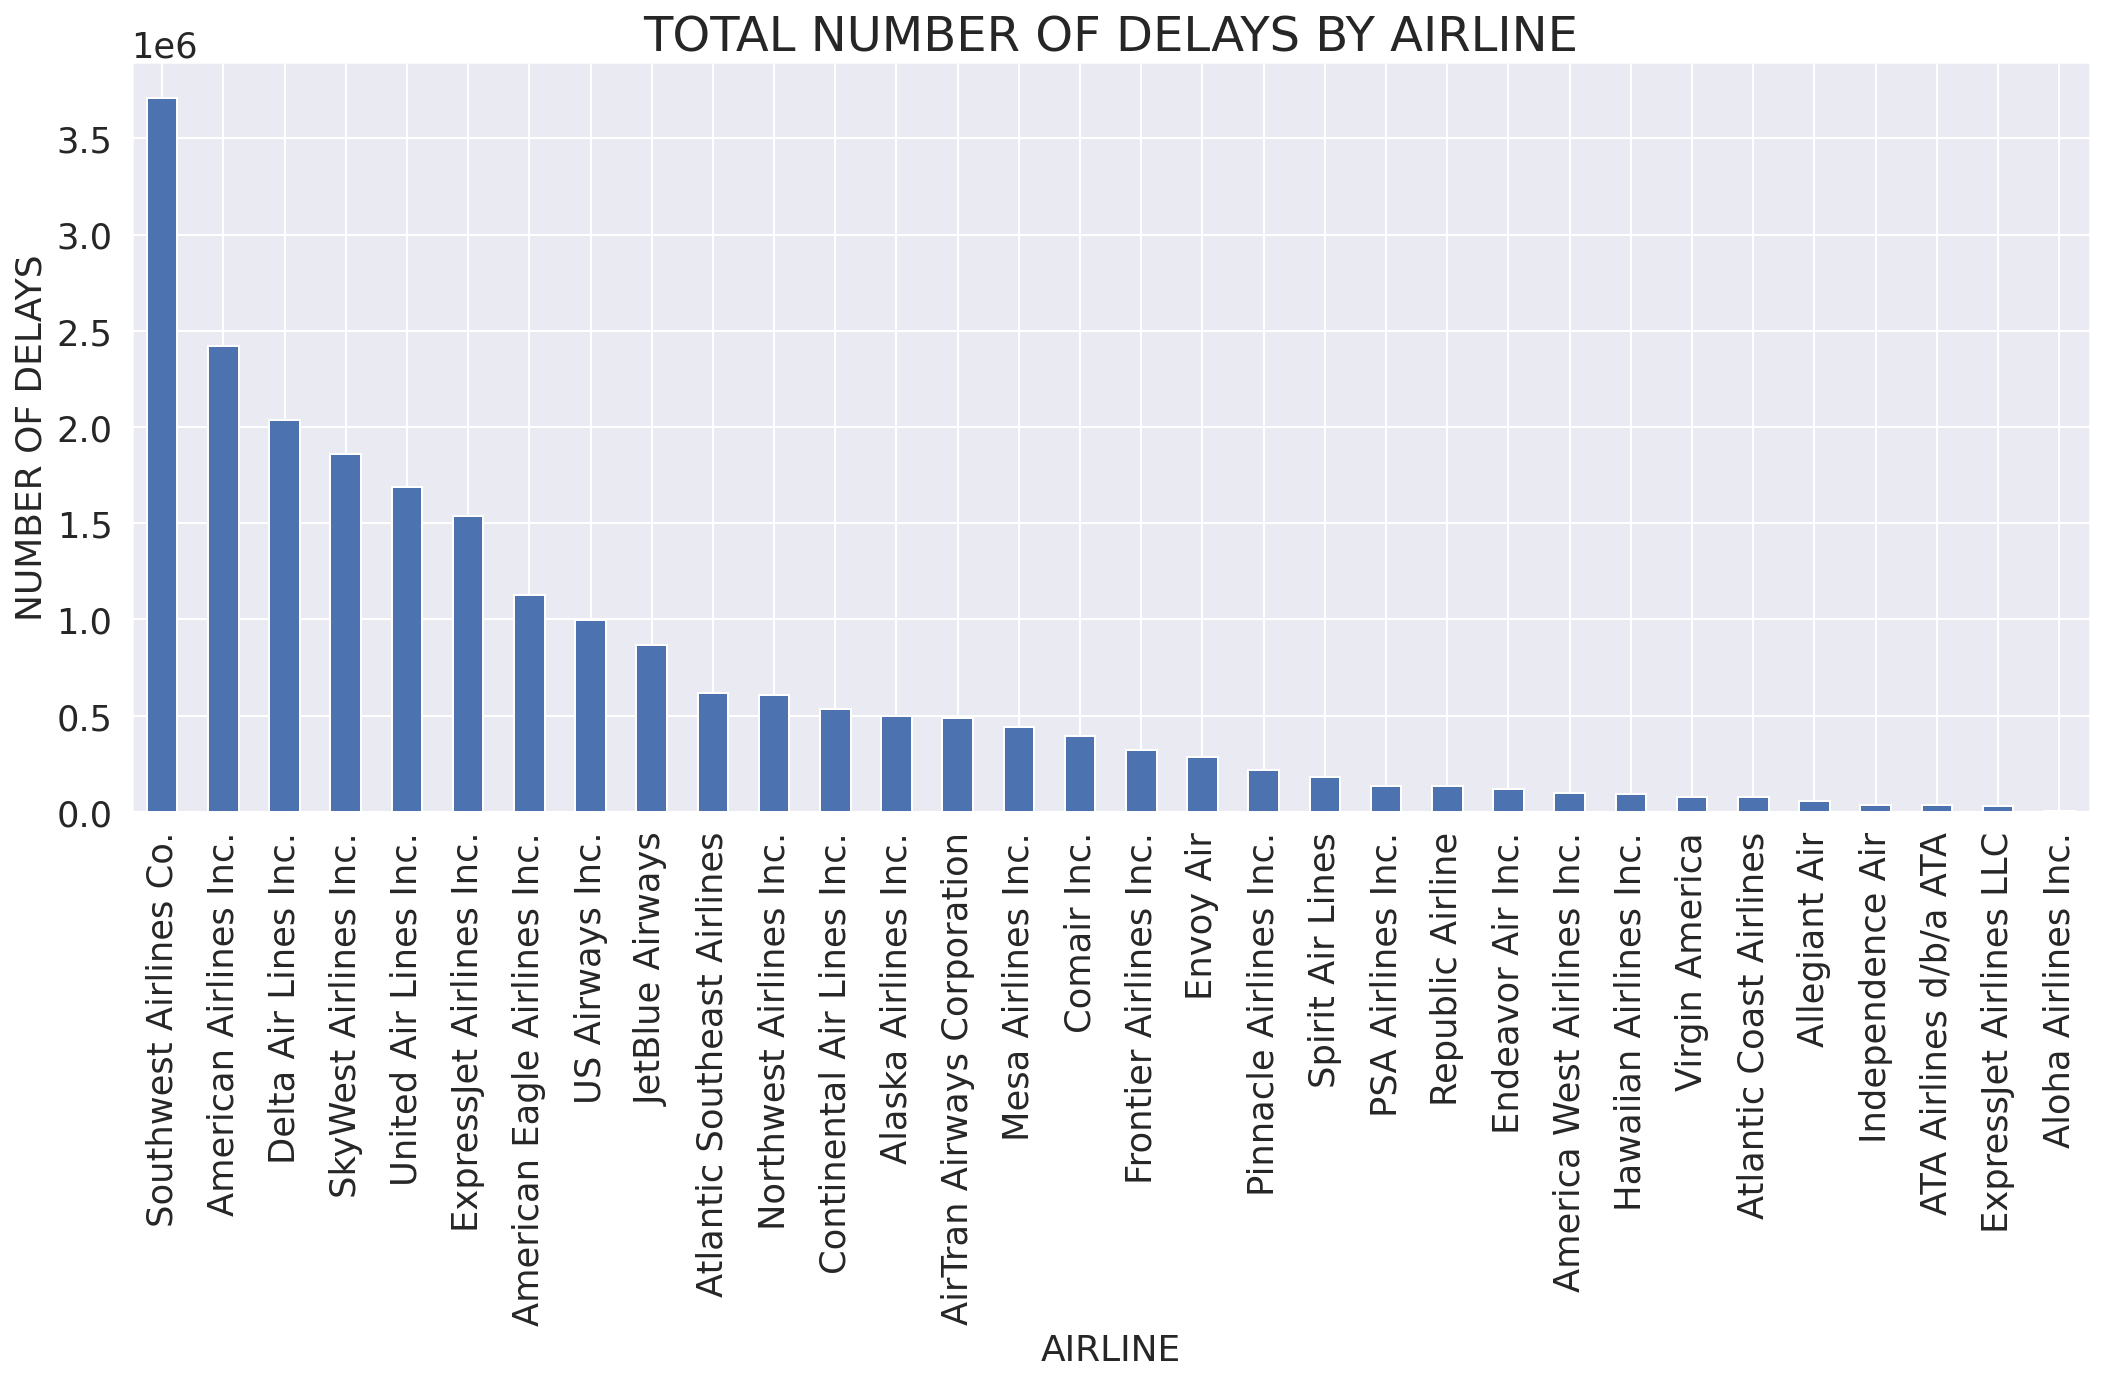

In [14]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.6)
df.groupby('carrier_name').arr_delay_ct.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL NUMBER OF DELAYS BY AIRLINE', fontsize=24)
plt.xlabel('AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF DELAYS', fontsize=18)
plt.tight_layout()
plt.show()

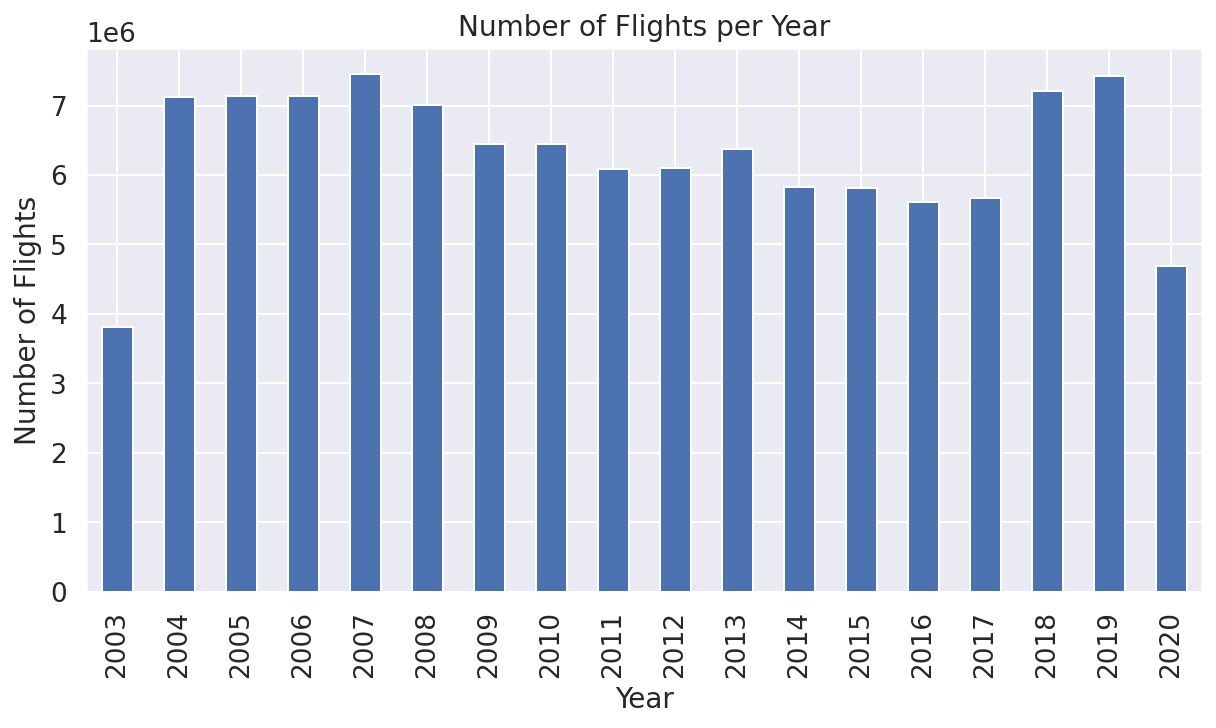

In [15]:
plt.figure(figsize=(10, 5))
sns.set(font_scale=1.2)
df.groupby('year').arr_flights_ct.sum().plot.bar()
plt.title('Number of Flights per Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

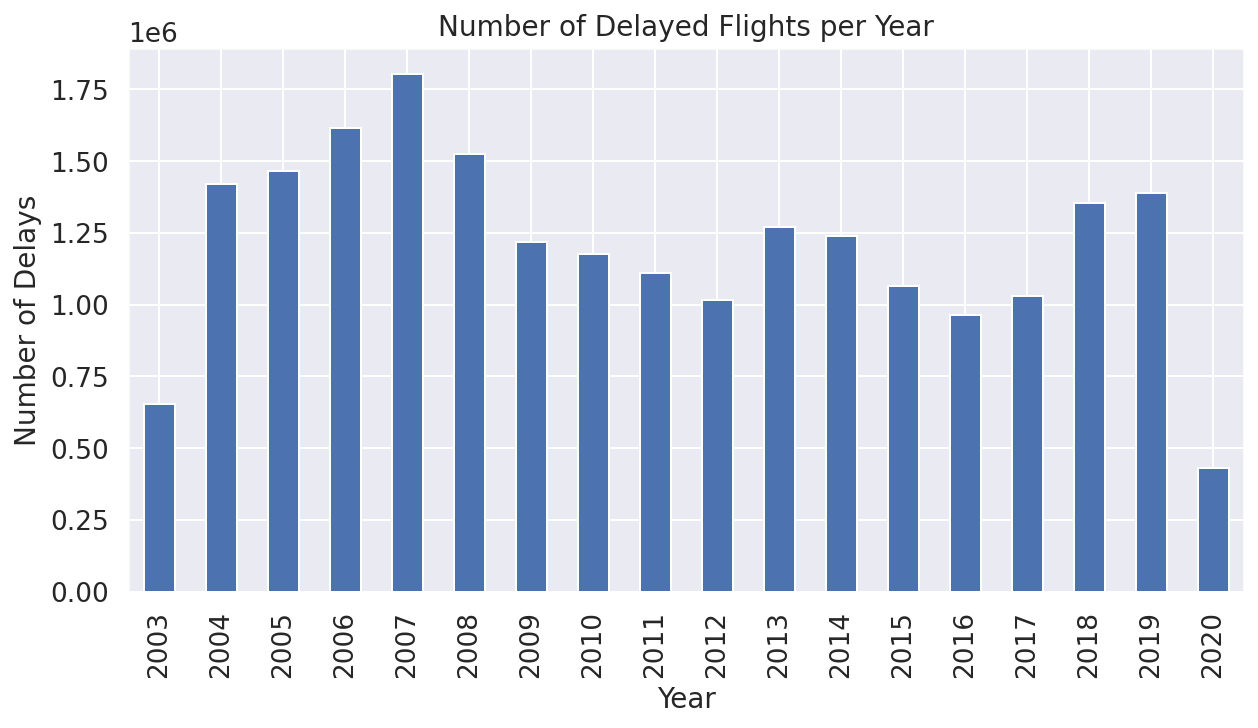

In [16]:
plt.figure(figsize=(10, 5))
sns.set(font_scale=1.2)
df.groupby('year').arr_delay_ct.sum().plot.bar()
plt.title('Number of Delayed Flights per Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Delays', fontsize=14)
plt.show()

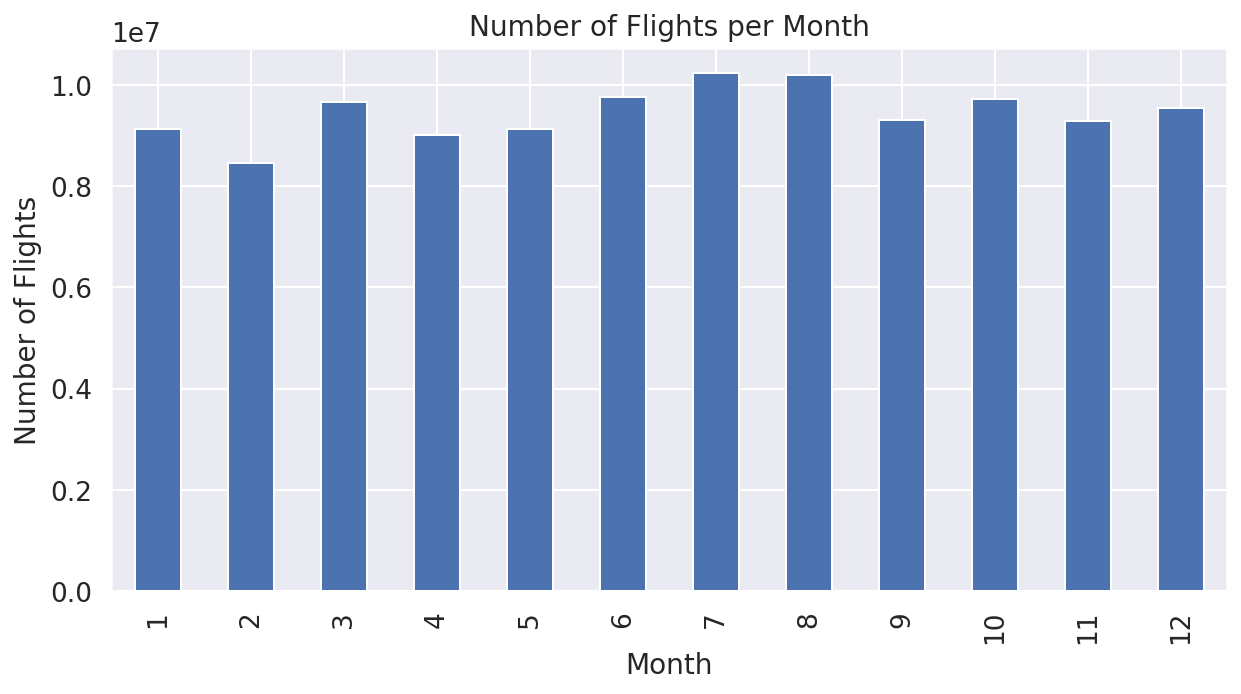

In [17]:
plt.figure(figsize=(10, 5))
sns.set(font_scale=1.2)
df.groupby('month').arr_flights_ct.sum().plot.bar()
plt.title('Number of Flights per Month', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

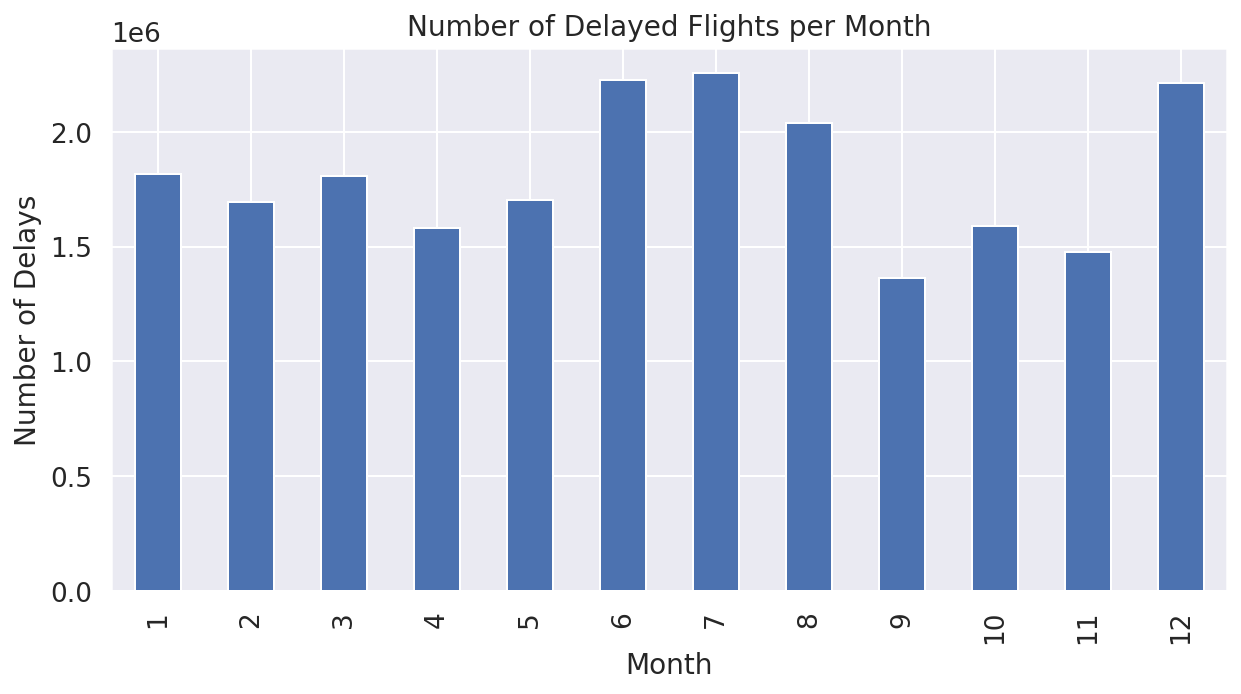

In [18]:
plt.figure(figsize=(10, 5))
sns.set(font_scale=1.2)
df.groupby('month').arr_delay_ct.sum().plot.bar()
plt.title('Number of Delayed Flights per Month', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Delays', fontsize=14)
plt.show()

Plot line chart to show causes of delays changes monthly through the year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


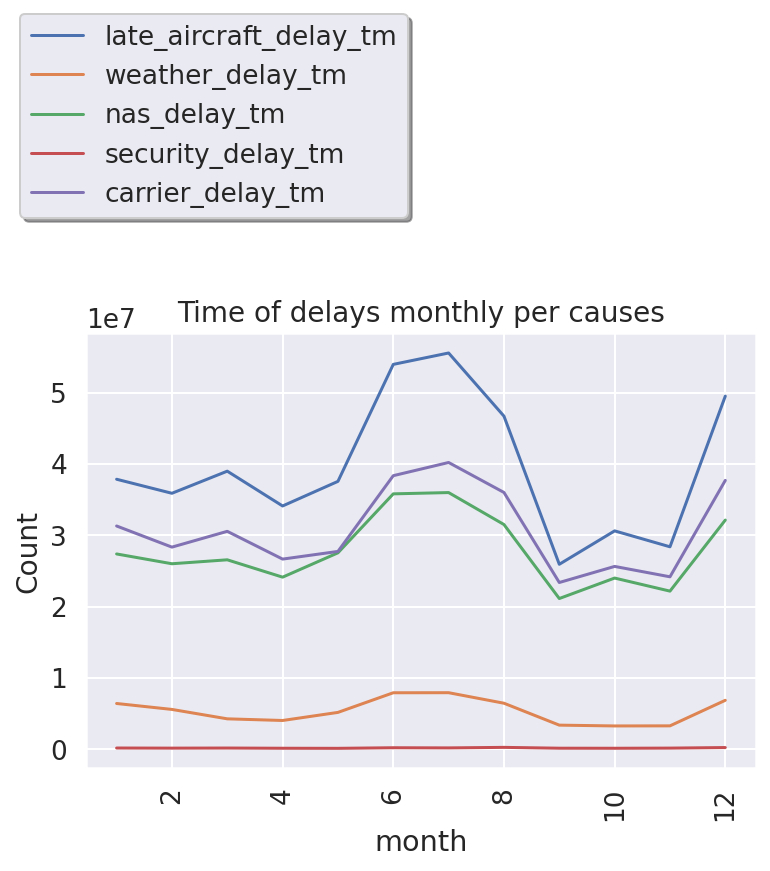

In [19]:
df2 = df.filter(['month','weather_delay_tm','nas_delay_tm','security_delay_tm','late_aircraft_delay_tm','carrier_delay_tm'], axis=1)
df2 = df2.groupby('month')['late_aircraft_delay_tm','weather_delay_tm','nas_delay_tm','security_delay_tm','carrier_delay_tm'].sum().plot()
df2.legend(loc='right',  bbox_to_anchor=(0.5, 1.5), ncol=1, fancybox=True, shadow=True)
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 7,4
plt.title('Time of delays monthly per causes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.show();

Plotting barplot to show total number of delay compared to total number of flights per AIRLINE

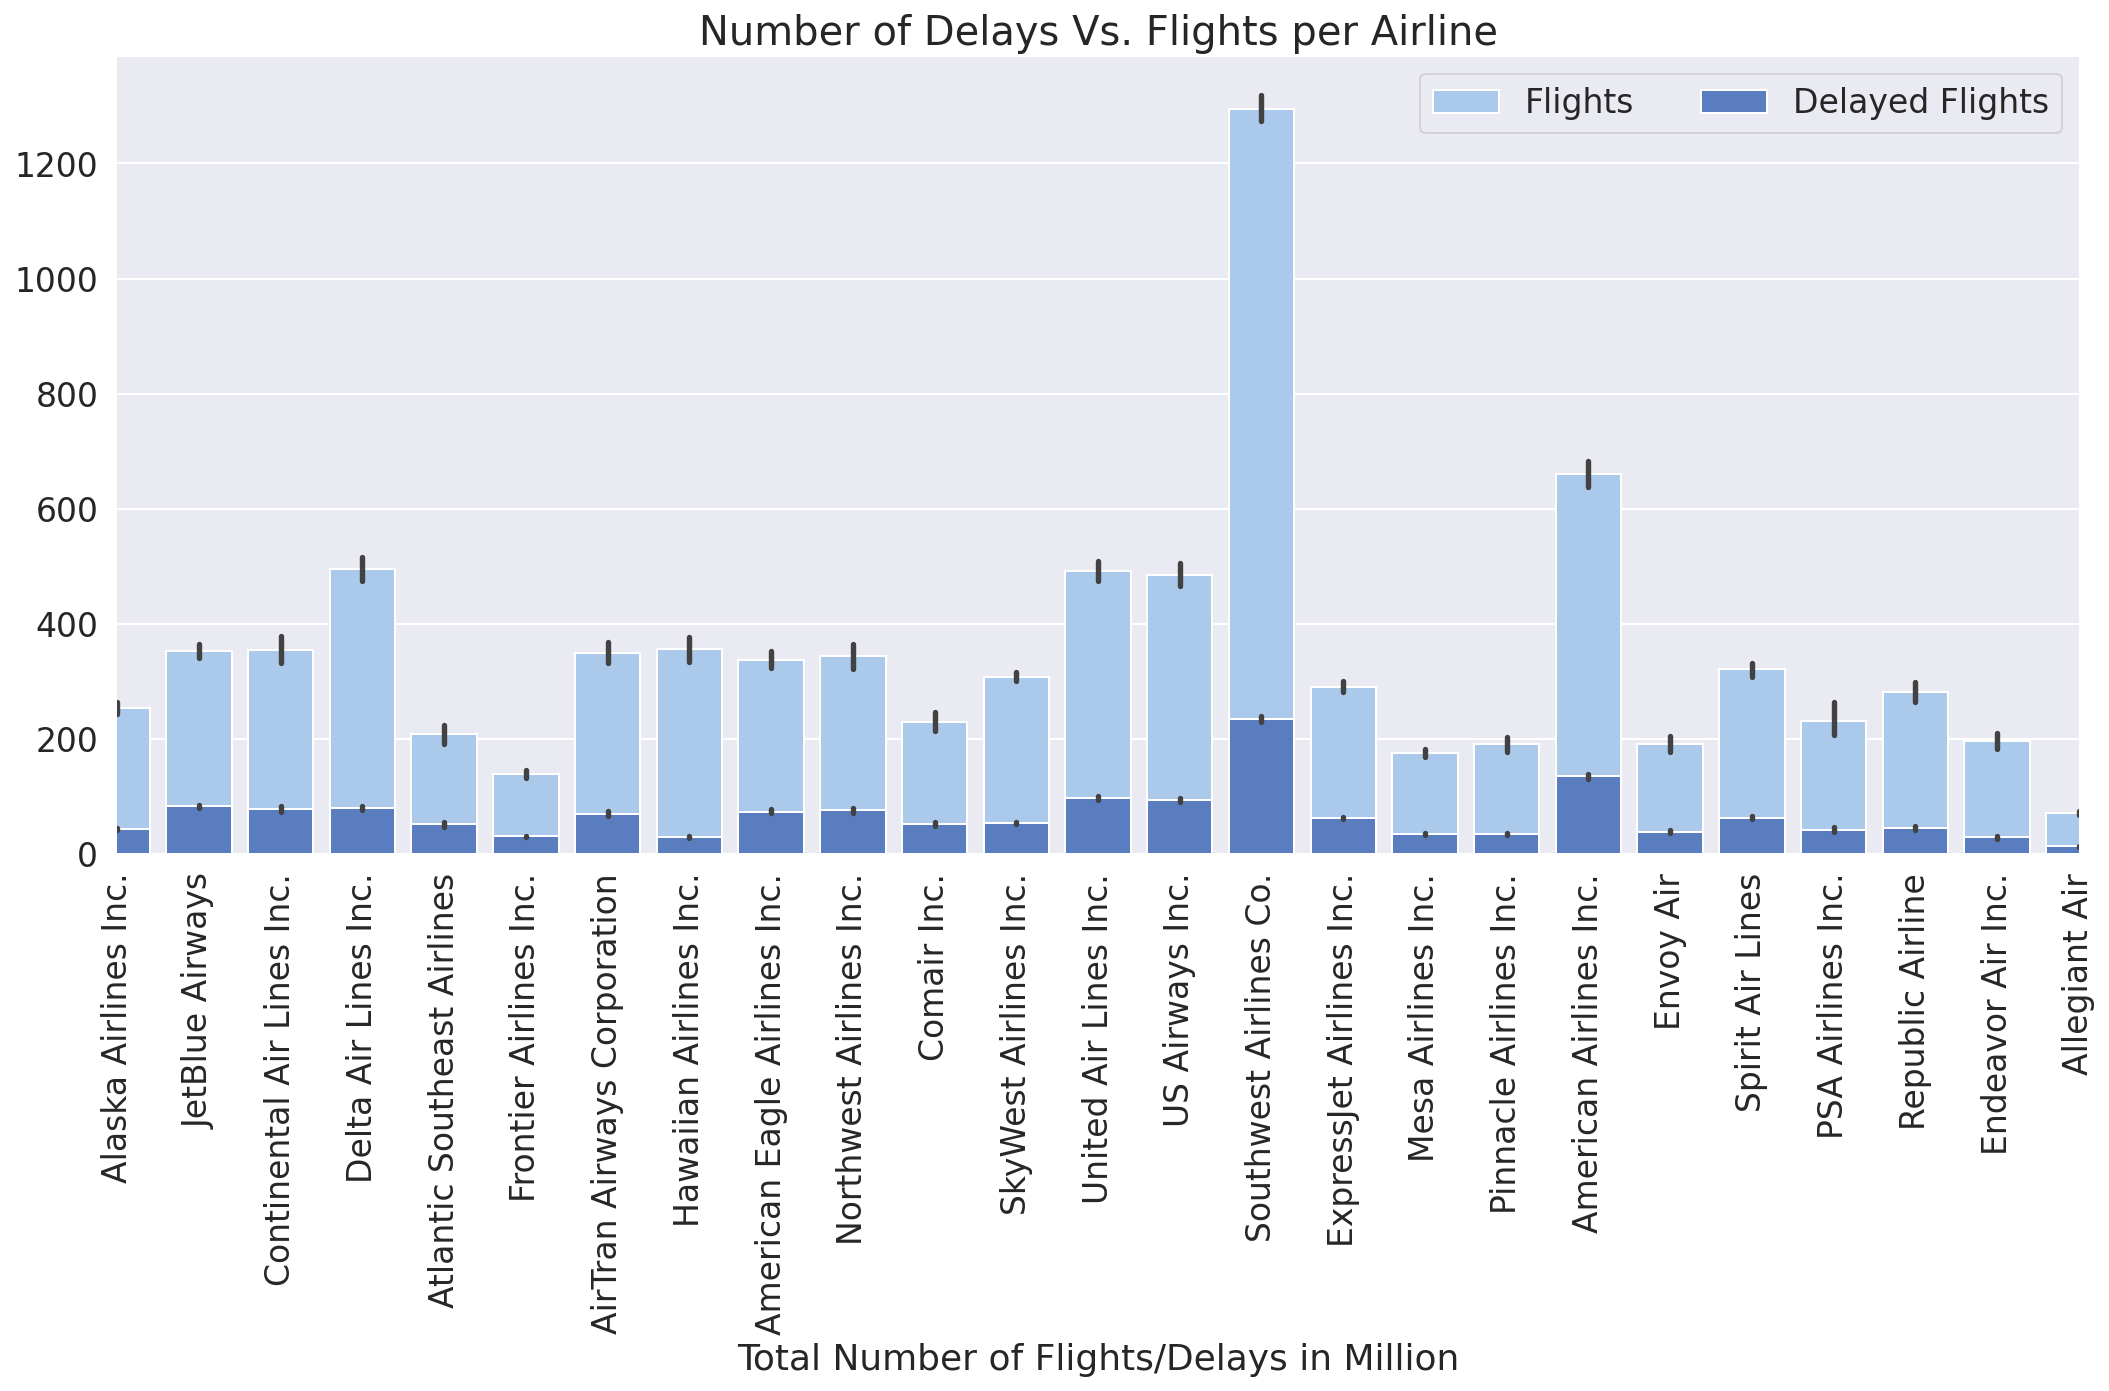

In [20]:
# Setting the plot
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total flights
sns.set_color_codes("pastel")
sns.barplot(x="carrier_name", y="arr_flights_ct", data=df,
            label="Flights", color="b")

# Plot the total flights delay
sns.set_color_codes("muted")
sns.barplot(x="carrier_name", y="arr_delay_ct", data=df,
            label="Delayed Flights", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Total Number of Flights/Delays in Million")
sns.despine(left=True, bottom=True)


plt.title('Number of Delays Vs. Flights per Airline', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()

Plotting barplot to show total number of delays due to carrier compared to total number of delays per AIRLINE

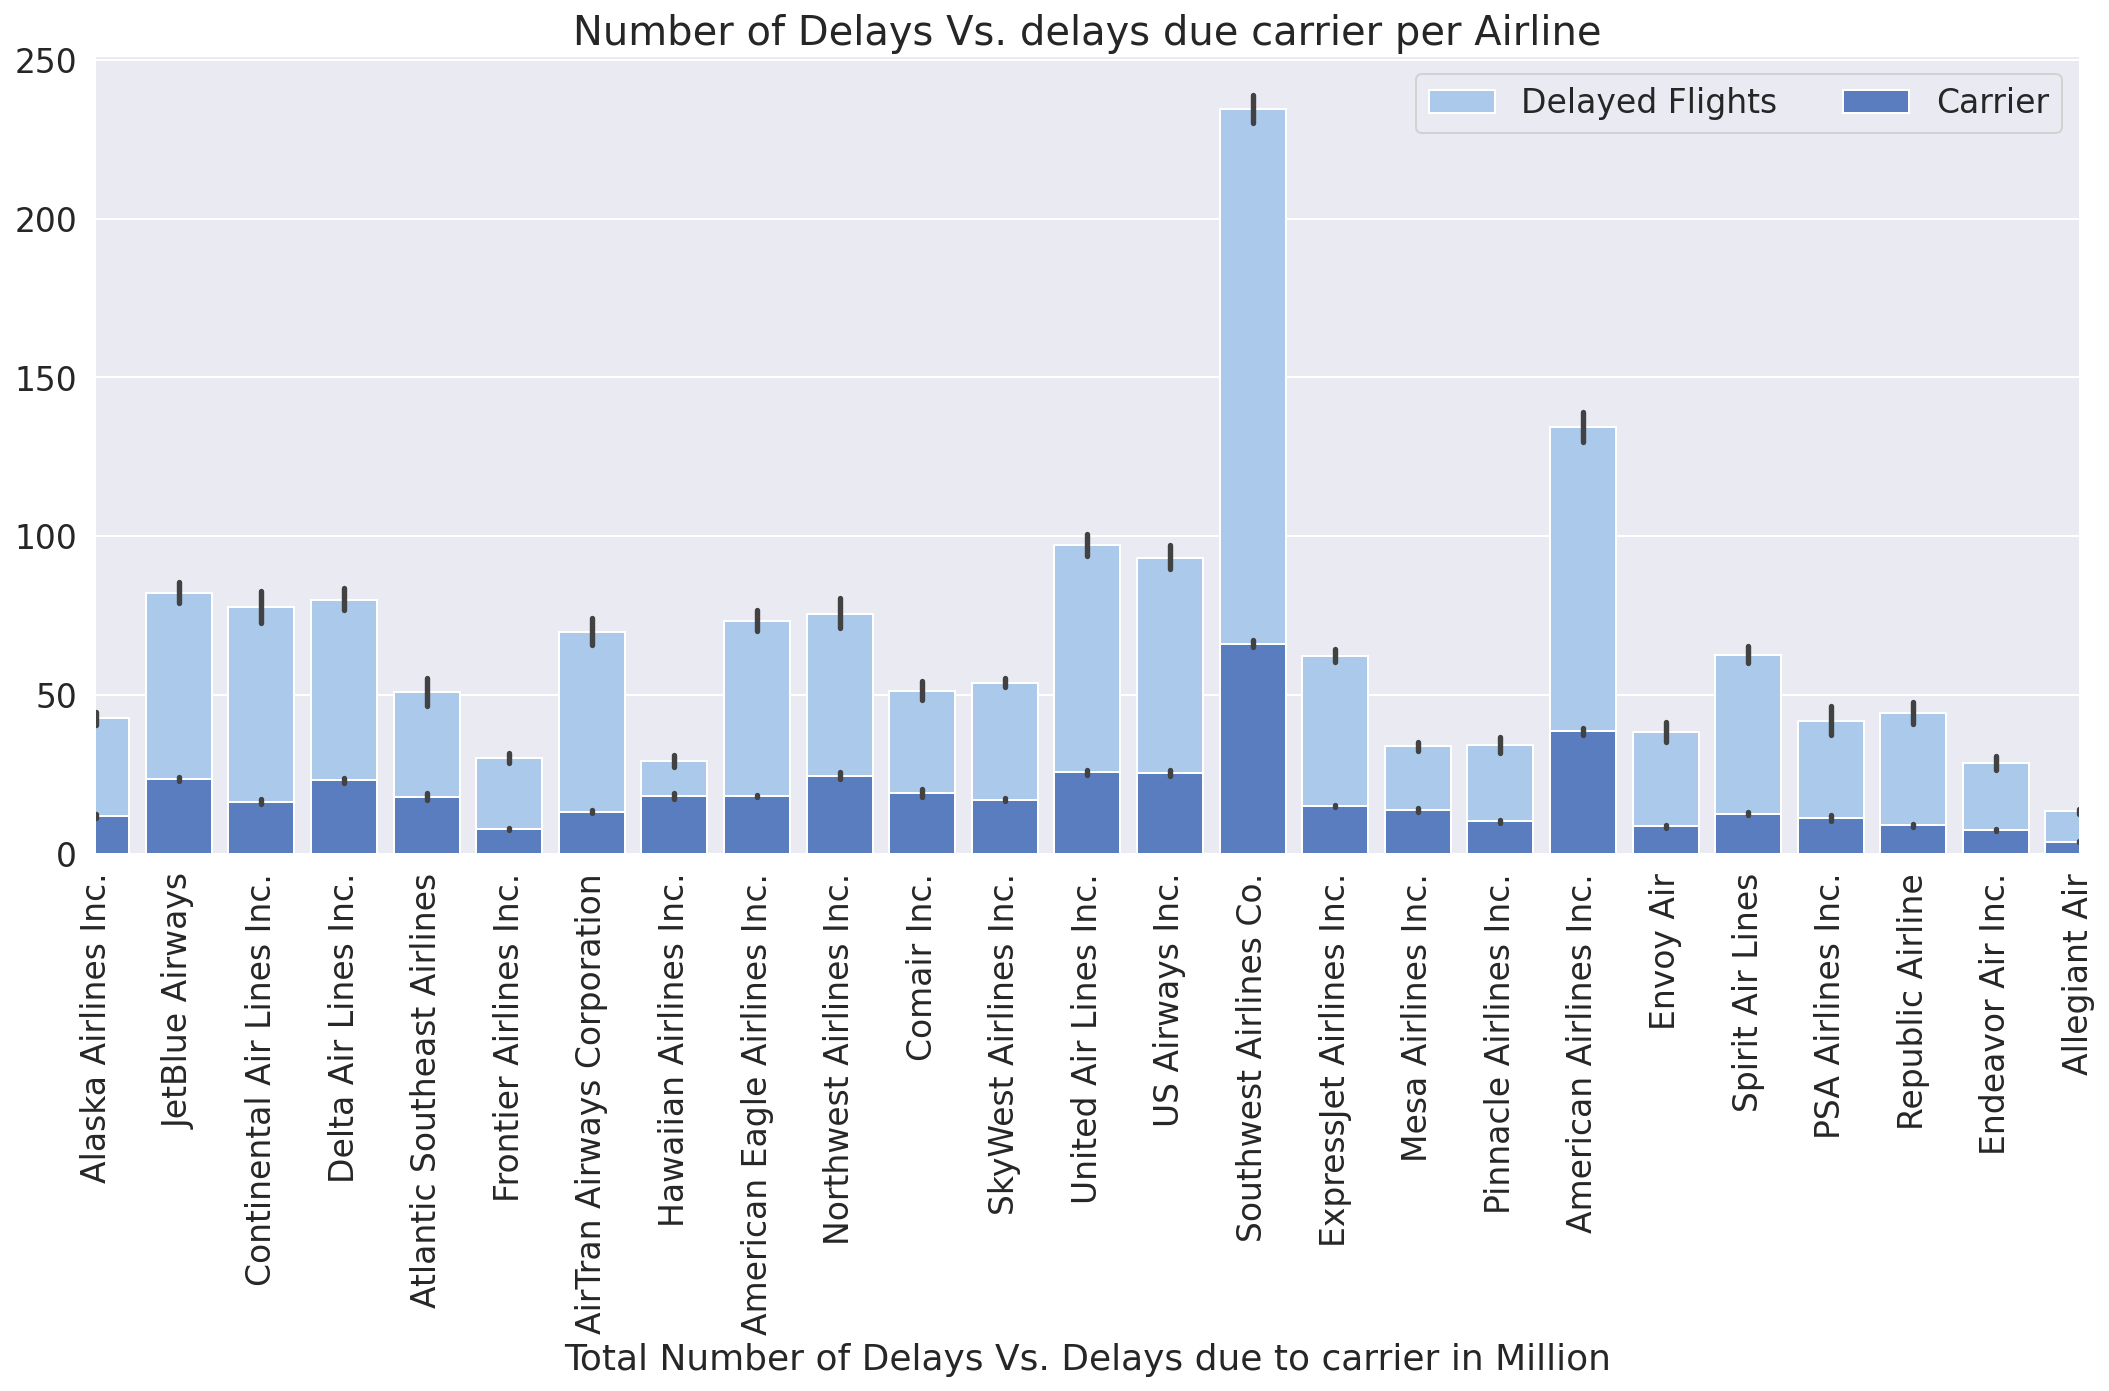

In [21]:
# Setting the plot
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total flights
sns.set_color_codes("pastel")
sns.barplot(x="carrier_name", y="arr_delay_ct", data=df,
            label="Delayed Flights", color="b")

# Plot the total flights delay
sns.set_color_codes("muted")
sns.barplot(x="carrier_name", y="carrier_ct", data=df,
            label="Carrier", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Total Number of Delays Vs. Delays due to carrier in Million")
sns.despine(left=True, bottom=True)


plt.title('Number of Delays Vs. delays due carrier per Airline', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()

Plotting barplot to show total number of delays due to late aircraft compared to total number of delays per AIRLINE

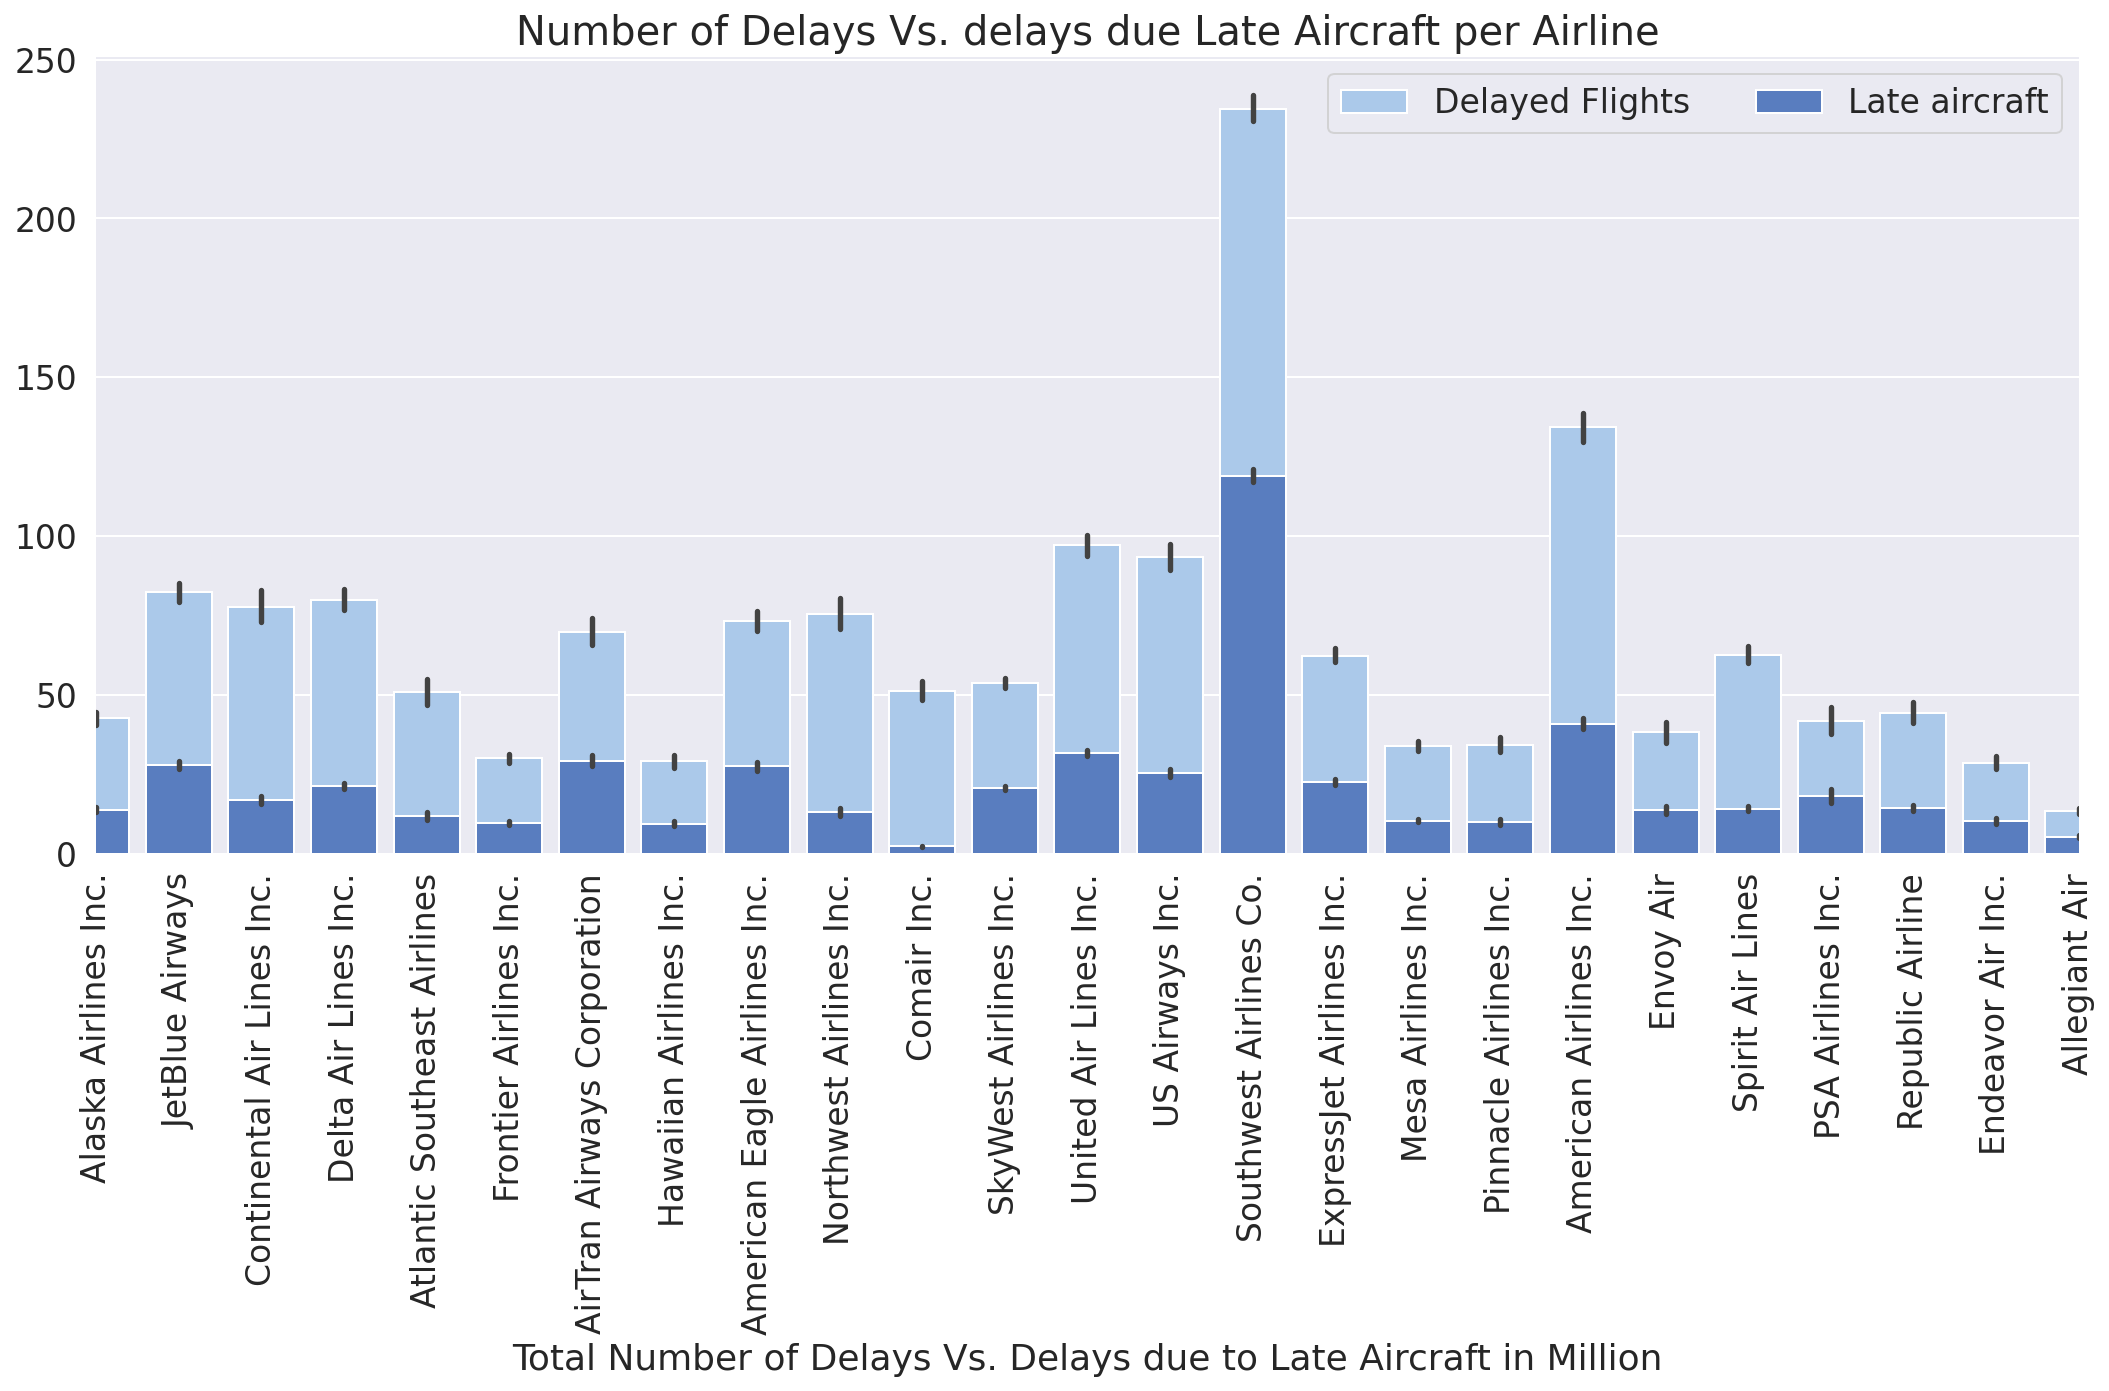

In [22]:
# Setting the plot
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total flights
sns.set_color_codes("pastel")
sns.barplot(x="carrier_name", y="arr_delay_ct", data=df,
            label="Delayed Flights", color="b")

# Plot the total flights delay
sns.set_color_codes("muted")
sns.barplot(x="carrier_name", y="late_aircraft_ct", data=df,
            label="Late aircraft", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Total Number of Delays Vs. Delays due to Late Aircraft in Million")
sns.despine(left=True, bottom=True)

plt.title('Number of Delays Vs. delays due Late Aircraft per Airline', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()

Plotting barplot to show total number of delays due to security compared to total number of delays per AIRLINE

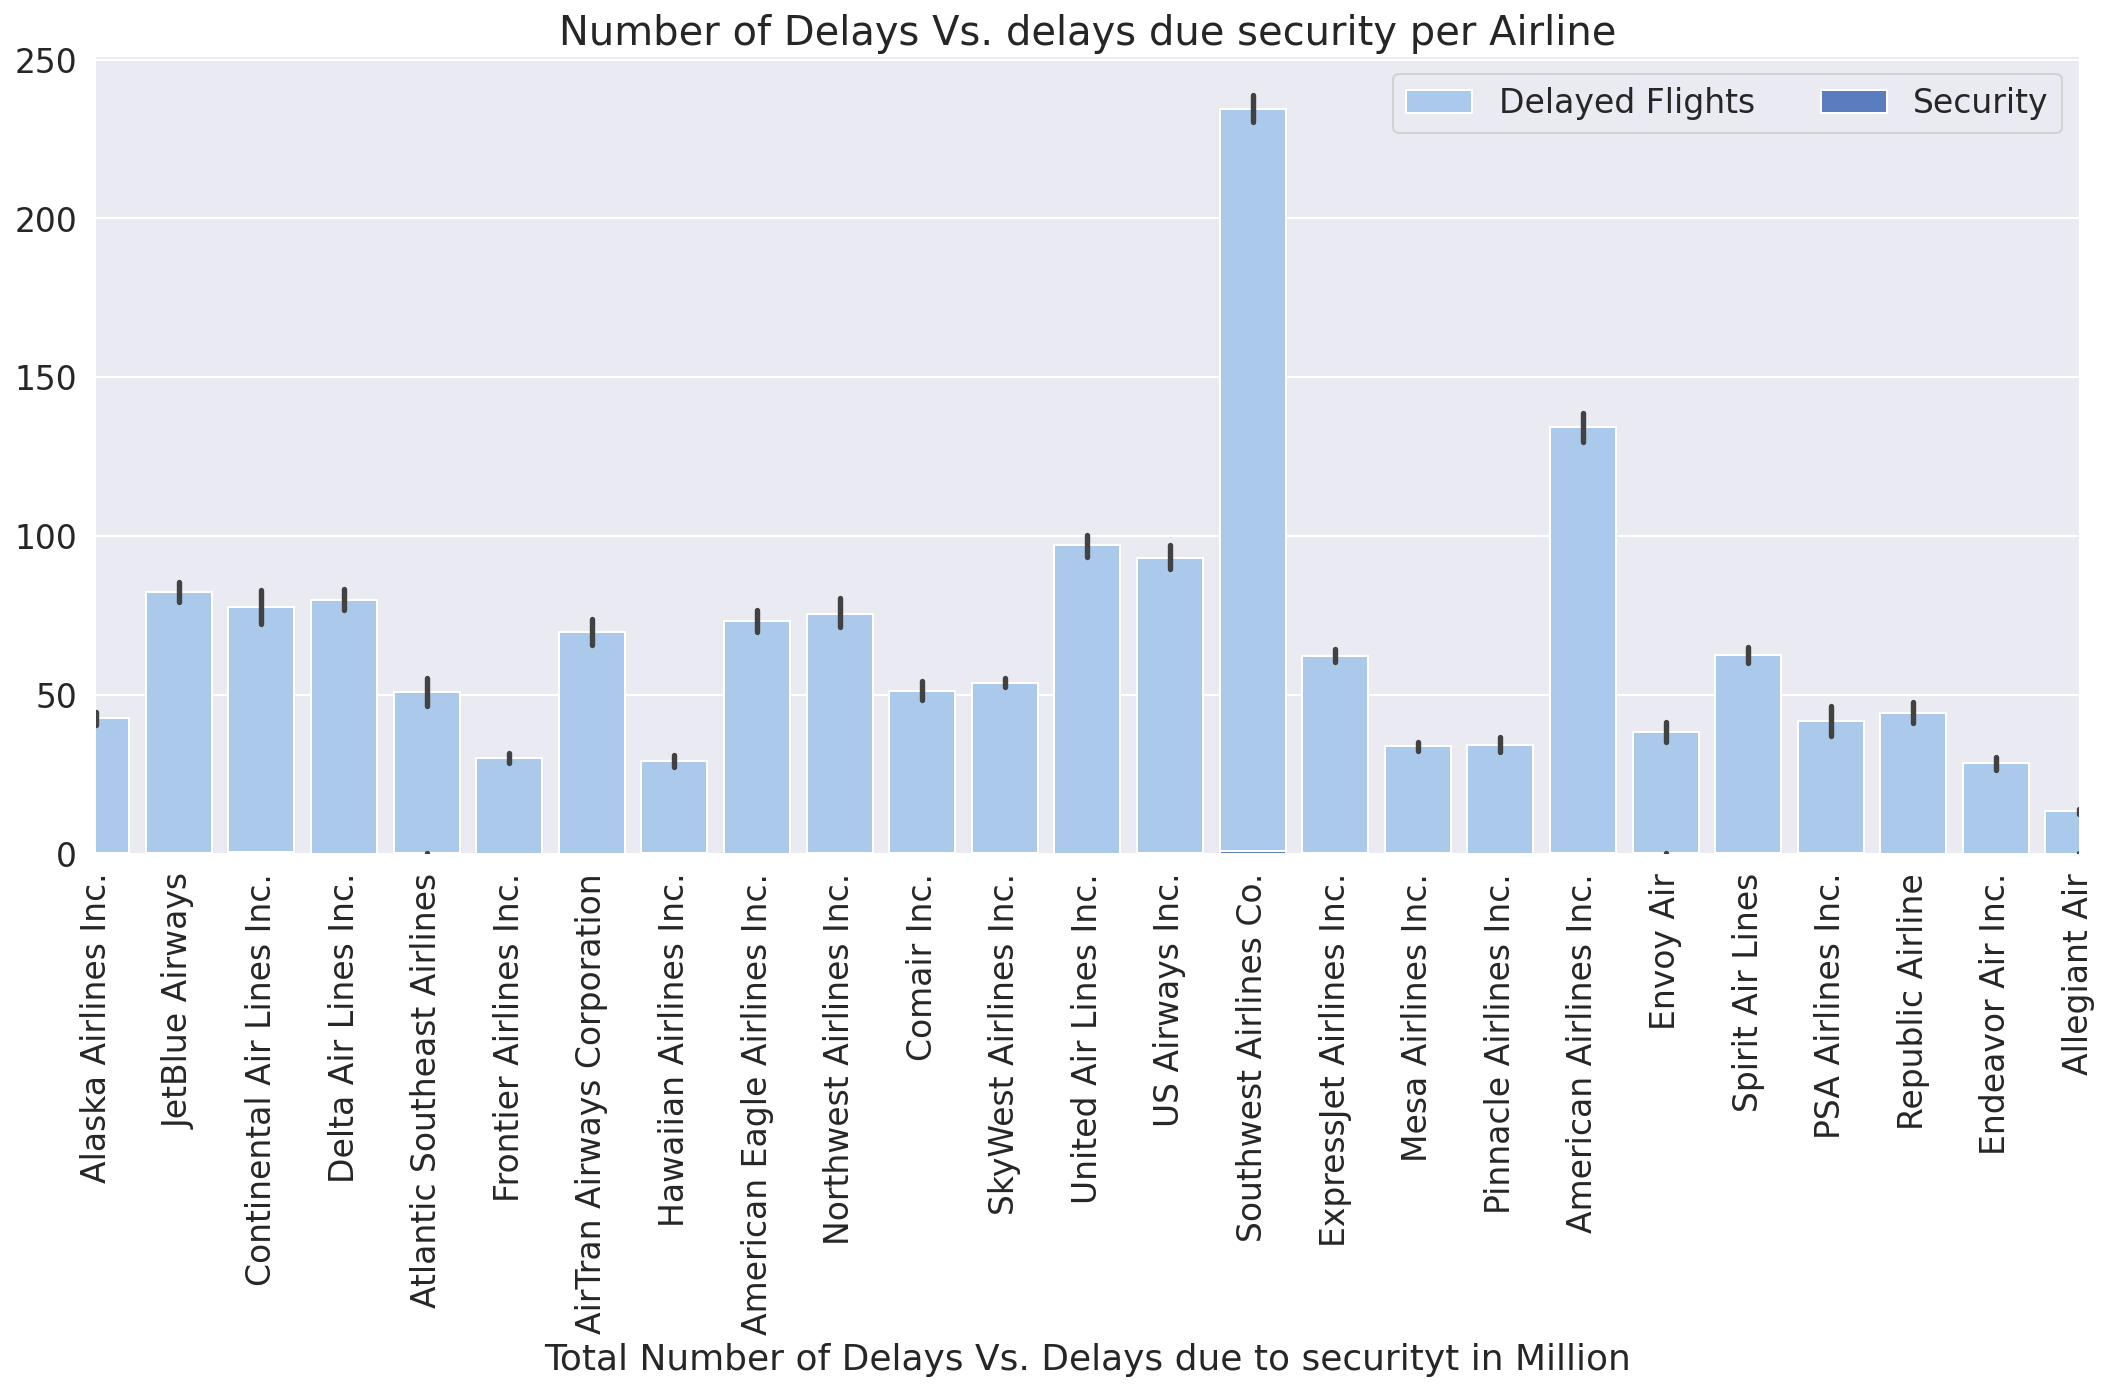

In [23]:
# Setting the plot
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total flights
sns.set_color_codes("pastel")
sns.barplot(x="carrier_name", y="arr_delay_ct", data=df,
            label="Delayed Flights", color="b")

# Plot the total flights delay
sns.set_color_codes("muted")
sns.barplot(x="carrier_name", y="security_ct", data=df,
            label="Security", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Total Number of Delays Vs. Delays due to securityt in Million")
sns.despine(left=True, bottom=True)

plt.title('Number of Delays Vs. delays due security per Airline', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()

Plotting barplot to show total number of delays due to weather compared to total number of delays per AIRLINE

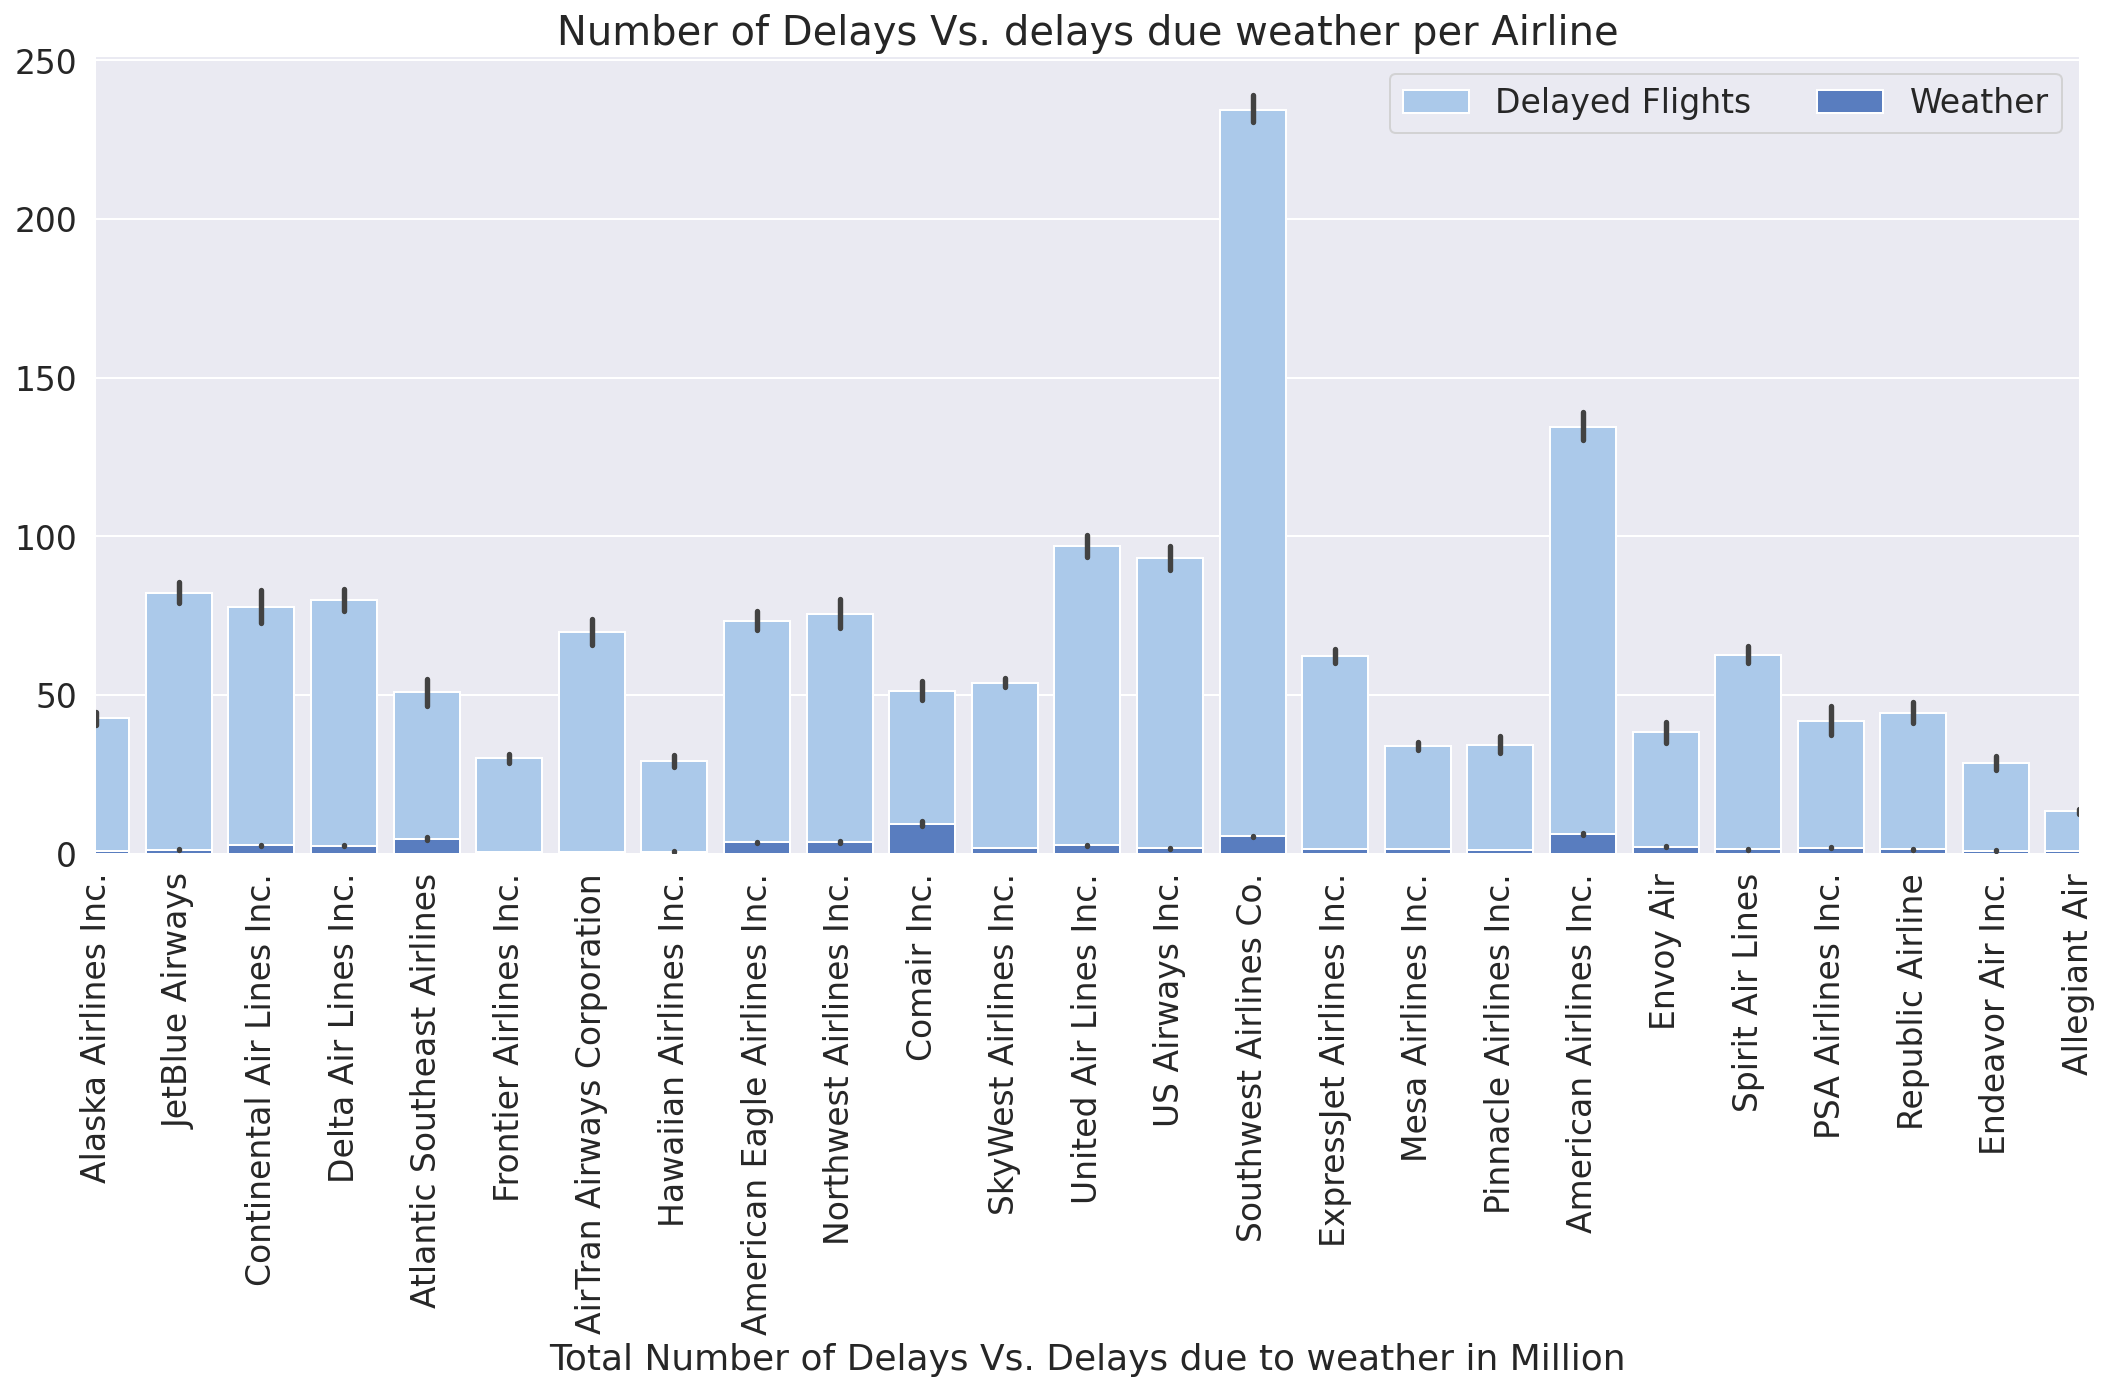

In [24]:
# Setting the plot
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total flights
sns.set_color_codes("pastel")
sns.barplot(x="carrier_name", y="arr_delay_ct", data=df,
            label="Delayed Flights", color="b")

# Plot the total flights delay
sns.set_color_codes("muted")
sns.barplot(x="carrier_name", y="weather_ct", data=df,
            label="Weather", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Total Number of Delays Vs. Delays due to weather in Million")
sns.despine(left=True, bottom=True)

plt.title('Number of Delays Vs. delays due weather per Airline', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()

Plotting barplot to show total number of delays due to NAS compared to total number of delays per AIRLINE

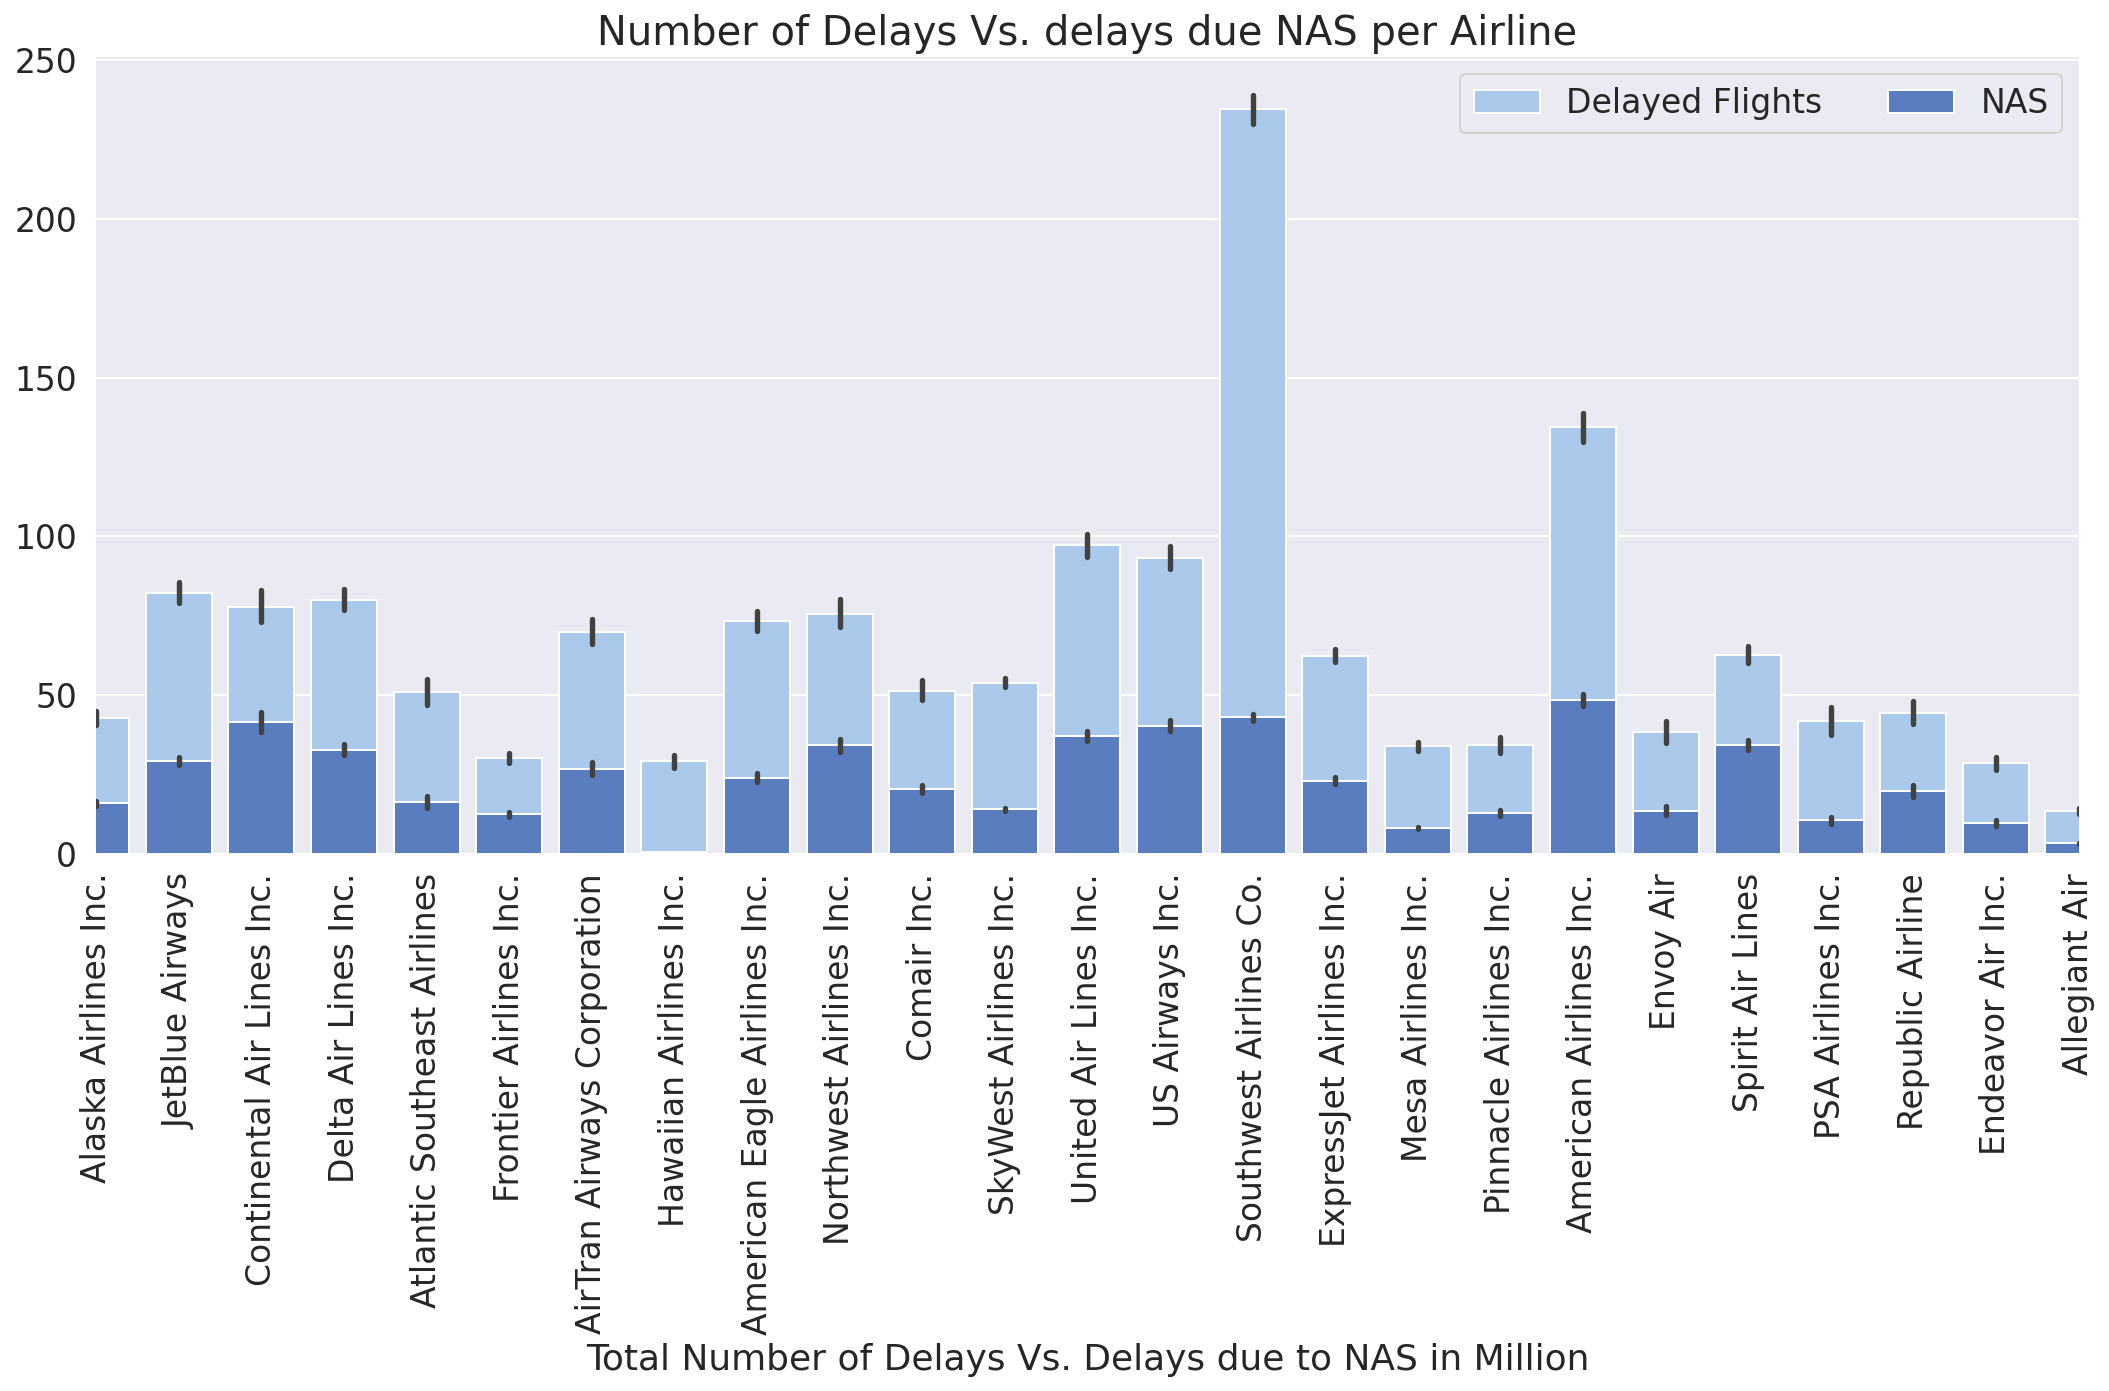

In [25]:
# Setting the plot
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total flights
sns.set_color_codes("pastel")
sns.barplot(x="carrier_name", y="arr_delay_ct", data=df,
            label="Delayed Flights", color="b")

# Plot the total flights delay
sns.set_color_codes("muted")
sns.barplot(x="carrier_name", y="nas_ct", data=df,
            label="NAS", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Total Number of Delays Vs. Delays due to NAS in Million")
sns.despine(left=True, bottom=True)

plt.title('Number of Delays Vs. delays due NAS per Airline', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()

Plotting Heatmap for DataFrame

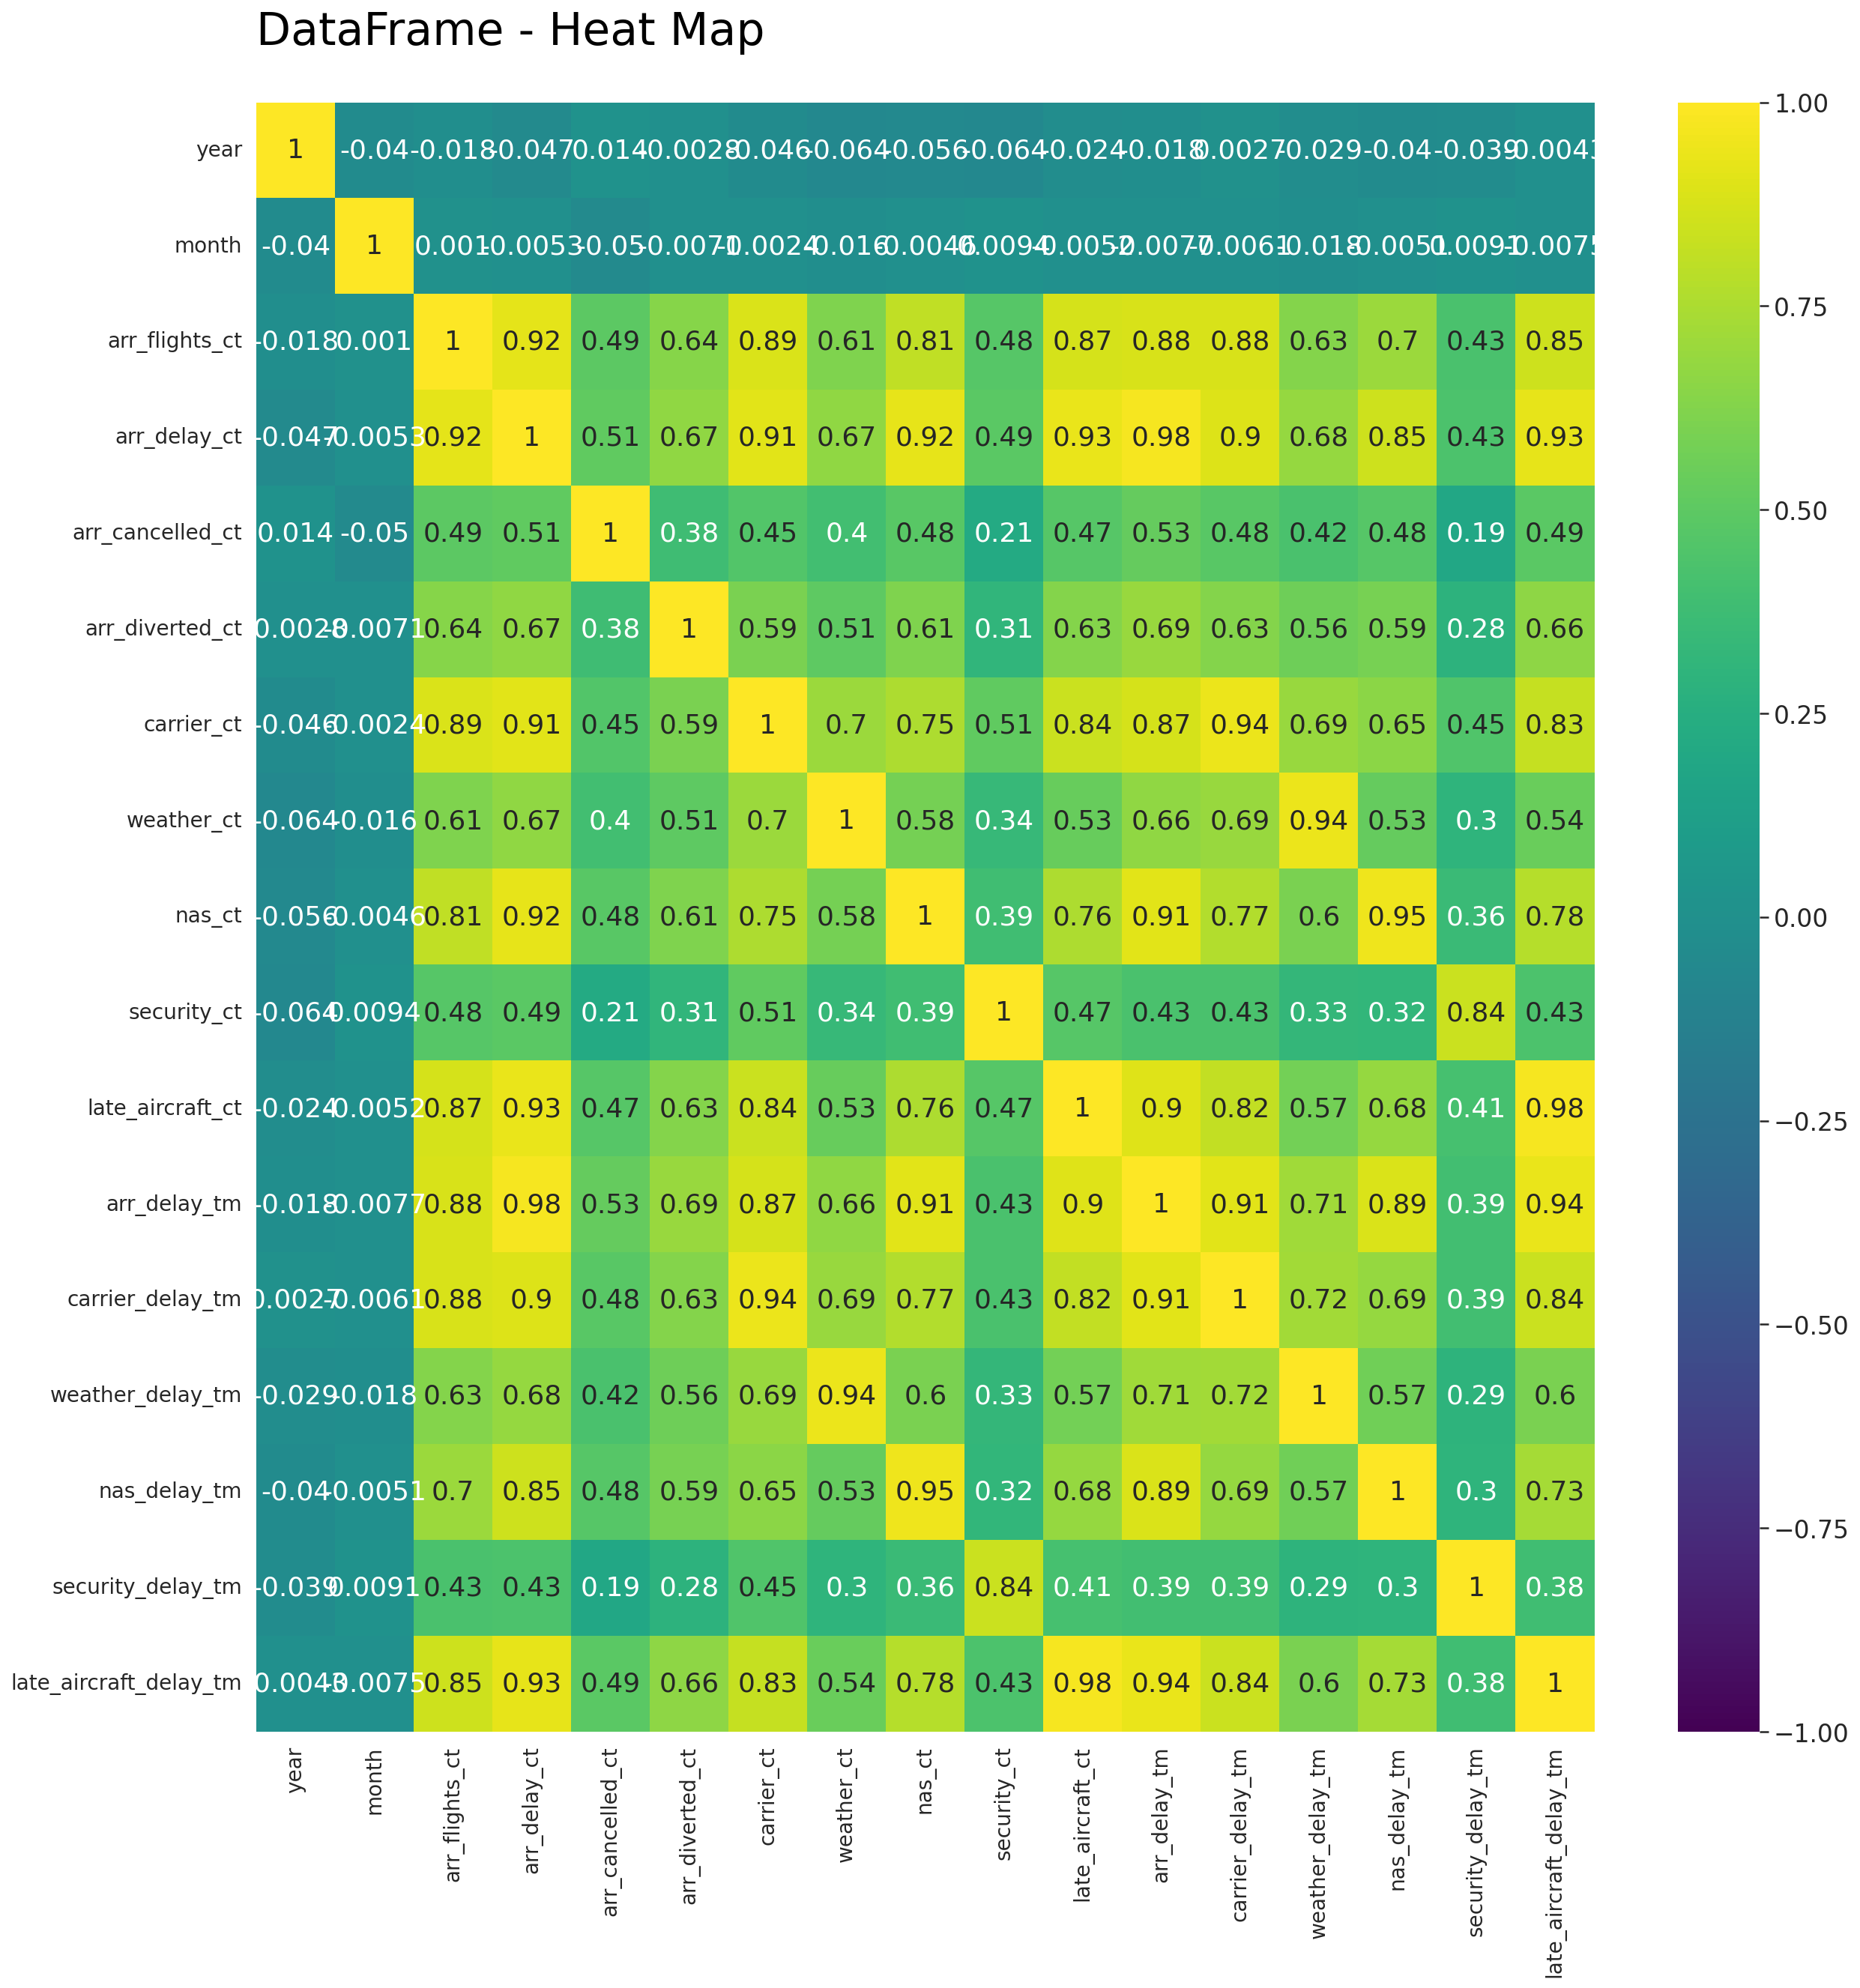

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='viridis', center=0, annot=True, vmin=-1, vmax=1)
plt.text(0,-0.6, "DataFrame - Heat Map", fontsize = 30, color='Black', fontstyle='normal')
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

In [27]:
new_df = df.drop(columns=['year','month','carrier','airport','airport_name'])

In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291981 entries, 0 to 292668
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   carrier_name            291981 non-null  object 
 1   arr_flights_ct          291981 non-null  float64
 2   arr_delay_ct            291981 non-null  float64
 3   arr_cancelled_ct        291981 non-null  float64
 4   arr_diverted_ct         291981 non-null  float64
 5   carrier_ct              291981 non-null  float64
 6   weather_ct              291981 non-null  float64
 7   nas_ct                  291981 non-null  float64
 8   security_ct             291981 non-null  float64
 9   late_aircraft_ct        291981 non-null  float64
 10  arr_delay_tm            291981 non-null  float64
 11  carrier_delay_tm        291981 non-null  float64
 12  weather_delay_tm        291981 non-null  float64
 13  nas_delay_tm            291981 non-null  float64
 14  security_delay_tm   

In [29]:
m_new_df = pd.get_dummies(new_df, columns=['carrier_name'])
m_new_df.sample()

,arr_flights_ct,arr_delay_ct,arr_cancelled_ct,arr_diverted_ct,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_delay_tm,carrier_delay_tm,weather_delay_tm,nas_delay_tm,security_delay_tm,late_aircraft_delay_tm,carrier_name_ATA Airlines d/b/a ATA,carrier_name_AirTran Airways Corporation,carrier_name_Alaska Airlines Inc.,carrier_name_Allegiant Air,carrier_name_Aloha Airlines Inc.,carrier_name_America West Airlines Inc.,carrier_name_American Airlines Inc.,carrier_name_American Eagle Airlines Inc.,carrier_name_Atlantic Coast Airlines,carrier_name_Atlantic Southeast Airlines,carrier_name_Comair Inc.,carrier_name_Continental Air Lines Inc.,carrier_name_Delta Air Lines Inc.,carrier_name_Endeavor Air Inc.,carrier_name_Envoy Air,carrier_name_ExpressJet Airlines Inc.,carrier_name_ExpressJet Airlines LLC,carrier_name_Frontier Airlines Inc.,carrier_name_Hawaiian Airlines Inc.,carrier_name_Independence Air,carrier_name_JetBlue Airways,carrier_name_Mesa Airlines Inc.,carrier_name_Northwest Airlines Inc.,carrier_name_PSA Airlines Inc.,carrier_name_Pinnacle Airlines Inc.,carrier_name_Republic Airline,carrier_name_SkyWest Airlines Inc.,carrier_name_Southwest Airlines Co.,carrier_name_Spirit Air Lines,carrier_name_US Airways Inc.,carrier_name_United Air Lines Inc.,carrier_name_Virgin America
28108,373.0,28.0,0.0,0.0,14.57,0.0,4.47,0.0,8.97,1492.0,512.0,0.0,321.0,0.0,659.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
X = m_new_df.drop(['arr_delay_tm','weather_delay_tm','nas_delay_tm','security_delay_tm','late_aircraft_delay_tm','carrier_delay_tm', 'arr_cancelled_ct',	'arr_diverted_ct',
                   'carrier_ct',	'weather_ct',	'nas_ct',	'security_ct',	'late_aircraft_ct'], axis=1)
y = m_new_df['late_aircraft_delay_tm']

print('X Shape   ', X.shape, 'y Shape   ', y.shape)

X Shape    (291981, 34) y Shape    (291981,)


In [38]:
# Use feature selection technique to select feature in your data that contribute the most in the prediction
#from sklearn.ensemble import ExtraTreesClassifier
#model = ExtraTreesClassifier()
#model.fit(X, y)
#print(model.feature_importances_)

# Visualizing for better understanding 
#ft_importances = pd.series(model.feature_importances_, index = X.columns)
#ft_importances.nlargest(15).plot(kind='barh')
#plt.show()

In [41]:
# fit model with target as housing price index
model = sm.OLS(y, X, data=m_new_df)

results = model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     late_aircraft_delay_tm   R-squared:                       0.864
Model:                                OLS   Adj. R-squared:                  0.864
Method:                     Least Squares   F-statistic:                 5.638e+04
Date:                    Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                            02:15:21   Log-Likelihood:            -2.6085e+06
No. Observations:                  291981   AIC:                         5.217e+06
Df Residuals:                      291947   BIC:                         5.218e+06
Df Model:                              33                                         
Covariance Type:                nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
arr_flights_ct                               -0.2190      0.008    -26.034      0.000      -0.236      -0.203
arr_delay_ct                                 23.6617      0.043    549.281      0.000      23.577      23.746
carrier_name_ATA Airlines d/b/a ATA         -71.7164     60.585     -1.184      0.237    -190.461      47.028
carrier_name_AirTran Airways Corporation    409.1901     22.043     18.563      0.000     365.986     452.394
carrier_name_Alaska Airlines Inc.          -159.9450     17.027     -9.394      0.000    -193.317    -126.573
carrier_name_Allegiant Air                   91.5379     28.243      3.241      0.001      36.182     146.893
carrier_name_Aloha Airlines Inc.           -133.6355    115.415     -1.158      0.247    -359.846      92.575
carrier_name_America West Airlines Inc.    -636.3486     46.205    -13.772      0.000    -726.908    -545.789
carrier_name_American Airlines Inc.        -171.2163     13.871    -12.343      0.000    -198.404    -144.029
carrier_name_American Eagle Airlines Inc.   -28.5611     14.843     -1.924      0.054     -57.653       0.531
carrier_name_Atlantic Coast Airlines        169.0657     51.865      3.260      0.001      67.411     270.720
carrier_name_Atlantic Southeast Airlines   -422.6766     16.672    -25.353      0.000    -455.353    -390.001
carrier_name_Comair Inc.                  -1023.4549     20.957    -48.836      0.000   -1064.530    -982.380
carrier_name_Continental Air Lines Inc.    -614.1685     22.125    -27.759      0.000    -657.533    -570.804
carrier_name_Delta Air Lines Inc.          -433.8750     11.633    -37.297      0.000    -456.676    -411.075
carrier_name_Endeavor Air Inc.              180.9702     28.132      6.433      0.000     125.833     236.107
carrier_name_Envoy Air                       25.6294     21.262      1.205      0.228     -16.043      67.302
carrier_name_ExpressJet Airlines Inc.       124.8498     11.748     10.628      0.000     101.825     147.875
carrier_name_ExpressJet Airlines LLC         20.0445     48.728      0.411      0.681     -75.461     115.550
carrier_name_Frontier Airlines Inc.          39.1671     17.814      2.199      0.028       4.253      74.082
carrier_name_Hawaiian Airlines Inc.        -234.1695     32.403     -7.227      0.000    -297.678    -170.661
carrier_name_Independence Air               458.6807     70.919      6.468      0.000     319.681     597.680
carrier_name_JetBlue Airways                236.4198     17.948     13.172      0.000     201.242     271.598
carrier_name_Mesa Airlines Inc.              52.7539     16.071      3.282      0.001      21.254      84.253
carrier_name_Northwest Airlines Inc.       -970.9952     20.477    -4

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=10)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(218985, 46)
(72996, 46)
(218985,)
(72996,)


In [43]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [44]:
regressor.score(X_test, y_test)

0.9999999986386501